In [1]:

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from shapely.geometry import shape
import utils
import importlib
from sklearn.mixture import BayesianGaussianMixture
import scipy
from scipy import stats
import itertools
import matplotlib.dates as mdates
from sklearn.neighbors import KernelDensity


In [88]:
# If you have made changes to a function and need to reload utils.
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\hildlars\\OneDrive - Universitetet i Oslo\\NordicMathCovid\\PanNordicMobility\\FinalFiles_commutingPaper\\Code\\utils.py'>

Read fitted models and data for each country, created and saved in the files "GMM_methodologyPaper_XXX_XXX.ipynb".

In [2]:
# Load previously fitted model and data for Finland-Sweden
models_fin = pd.read_pickle('../Data/models_fin.pkl')
data_fin = pd.read_pickle('../Data/data_fin.pkl')
agg_fin = pd.read_pickle('../Data/agg_data_fin.pkl')

In [3]:
# Load previously fitted model and data for Norway-Sweden
models_nor = pd.read_pickle('../Data/models_nor.pkl')
data_nor = pd.read_pickle('../Data/data_nor.pkl')
agg_nor = pd.read_pickle('../Data/agg_data_nor.pkl')

In [4]:
# Load previously fitted model and data for Denmark-Sweden
models_den = pd.read_pickle('../Data/models_den.pkl')
data_den = pd.read_pickle('../Data/data_den.pkl')
agg_den = pd.read_pickle('../Data/agg_data_den.pkl')

### Model evaluation

Evaluation consists of computing the log LR between our GMM and another model fitted separately for each day. 

In [5]:
# Takes a long time to run
eval_fin_gmm, emp_fin_gmm = utils.evaluation(agg_fin,models_fin,d1 = datetime.datetime(2017, 1, 1),d2 = datetime.datetime(2020,3,1),base_model='gmm_bayesian', eval_measure= 'KL', hourly = False, hourminute=True)

eval_fin_gmm.to_pickle('../Data/eval_fin_gmm_bayesian_KL.pkl') # log LR
emp_fin_gmm.to_pickle('../Data/emp_fin_gmm_bayesian_KL.pkl') # Model for denominator of the LR


In [6]:
eval_den_gmm, emp_den_gmm = utils.evaluation(agg_den,models_den,d1 = datetime.datetime(2017, 1, 1),d2 = datetime.datetime(2020,3,1),base_model='gmm_bayesian', eval_measure= 'KL', hourly = False, hourminute=True)

eval_den_gmm.to_pickle('../Data/eval_den_gmm_bayesian_KL.pkl')
emp_den_gmm.to_pickle('../Data/emp_den_gmm_bayesian_KL.pkl')


In [7]:
eval_nor_gmm, emp_nor_gmm = utils.evaluation(agg_nor,models_nor,d1 = datetime.datetime(2017, 1, 1),d2 = datetime.datetime(2020,3,1),base_model='gmm_bayesian', eval_measure= 'KL', hourly = True, hourminute=True)

eval_nor_gmm.to_pickle('../Data/eval_nor_gmm_bayesian_KL.pkl')
emp_nor_gmm.to_pickle('../Data/emp_nor_gmm_bayesian_KL.pkl')


Figure for model evaluation:

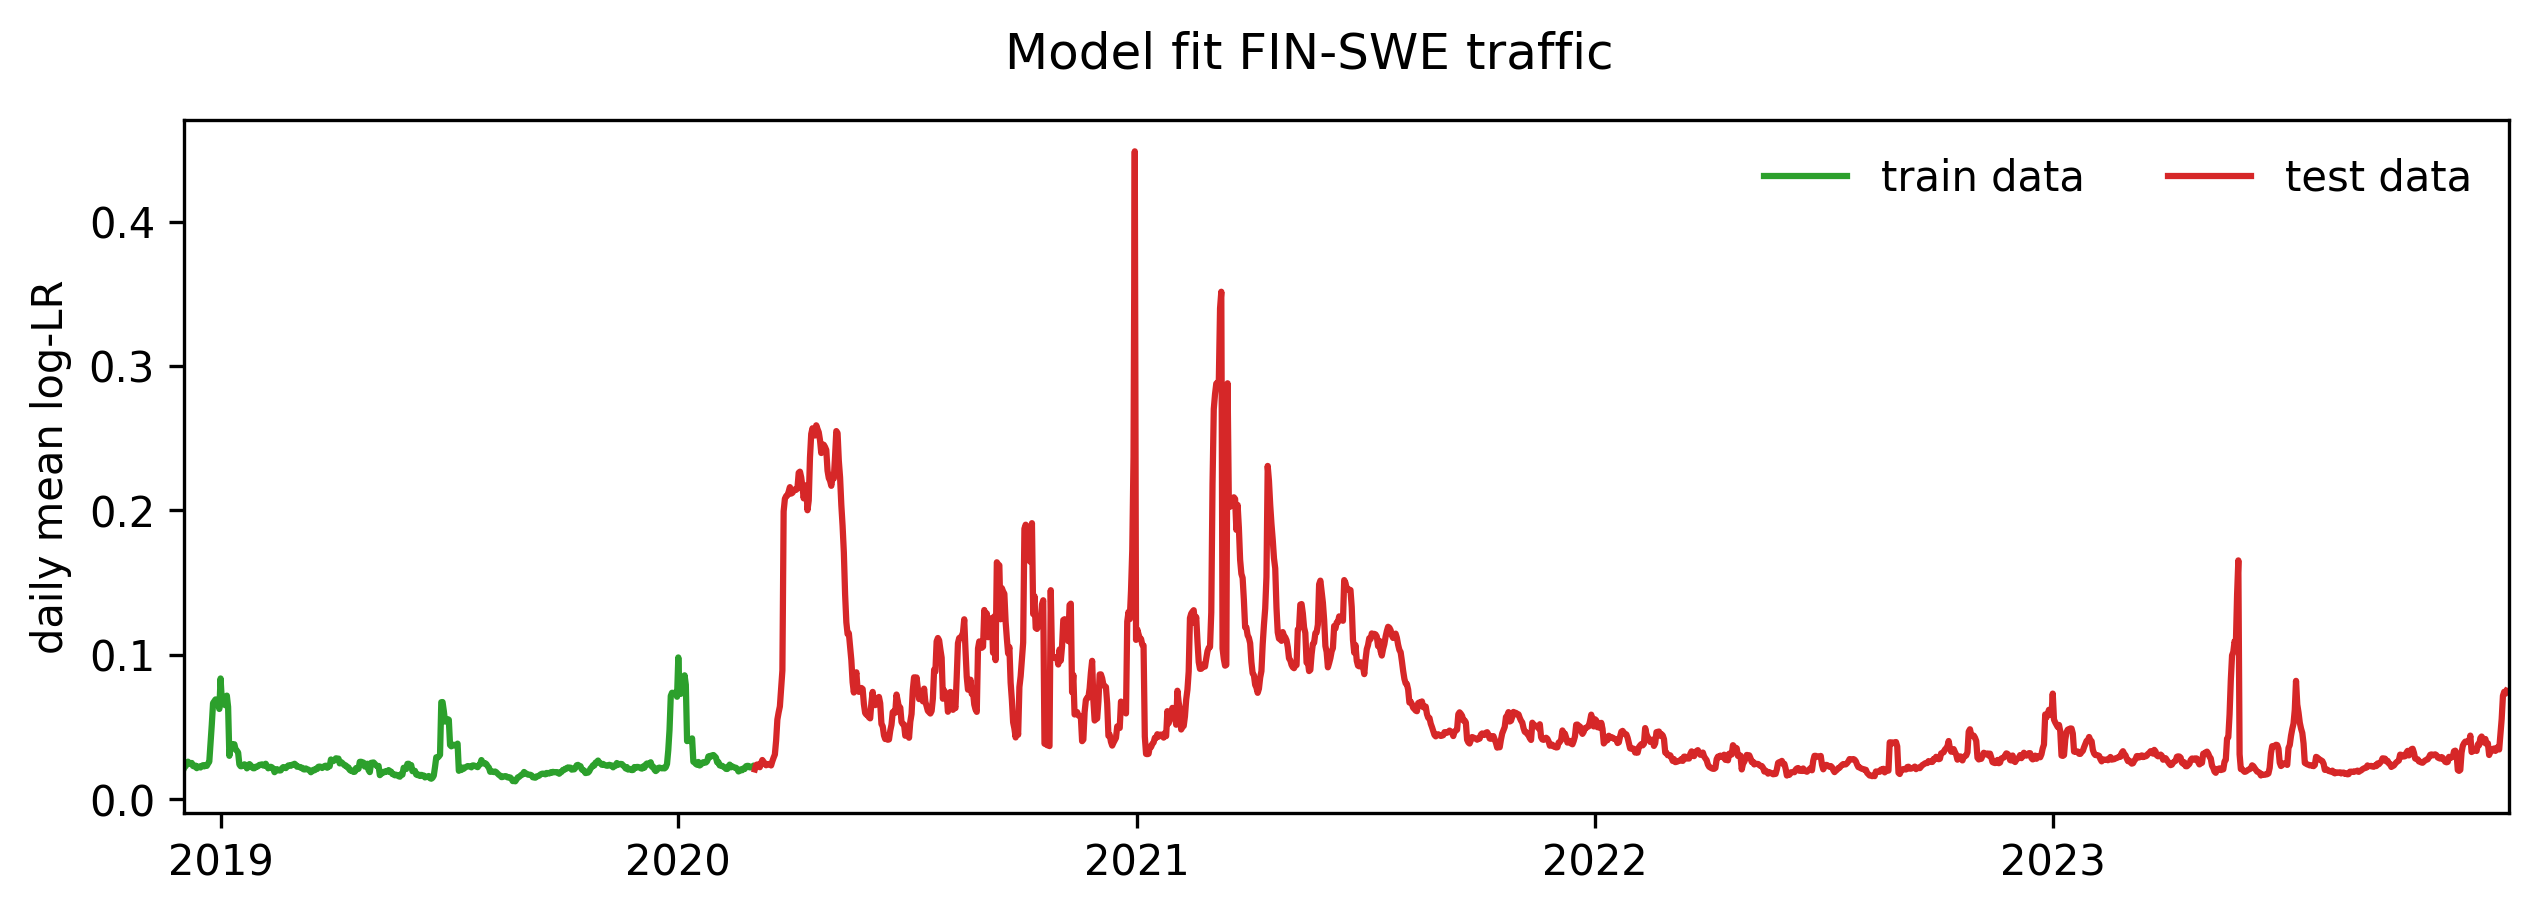

In [5]:
# Load evaluation and plot
eval_fin_gmm = pd.read_pickle('../Data/eval_fin_gmm_bayesian_KL.pkl')
utils.plot_evaluation_figure(eval_fin_gmm,d1 = datetime.date(2017,1,1), d2 = datetime.date(2020,3,1), title = 'Model fit FIN-SWE traffic',xlim_min = datetime.datetime(2018,12,3), xlim_max = datetime.datetime(2023,12,31))

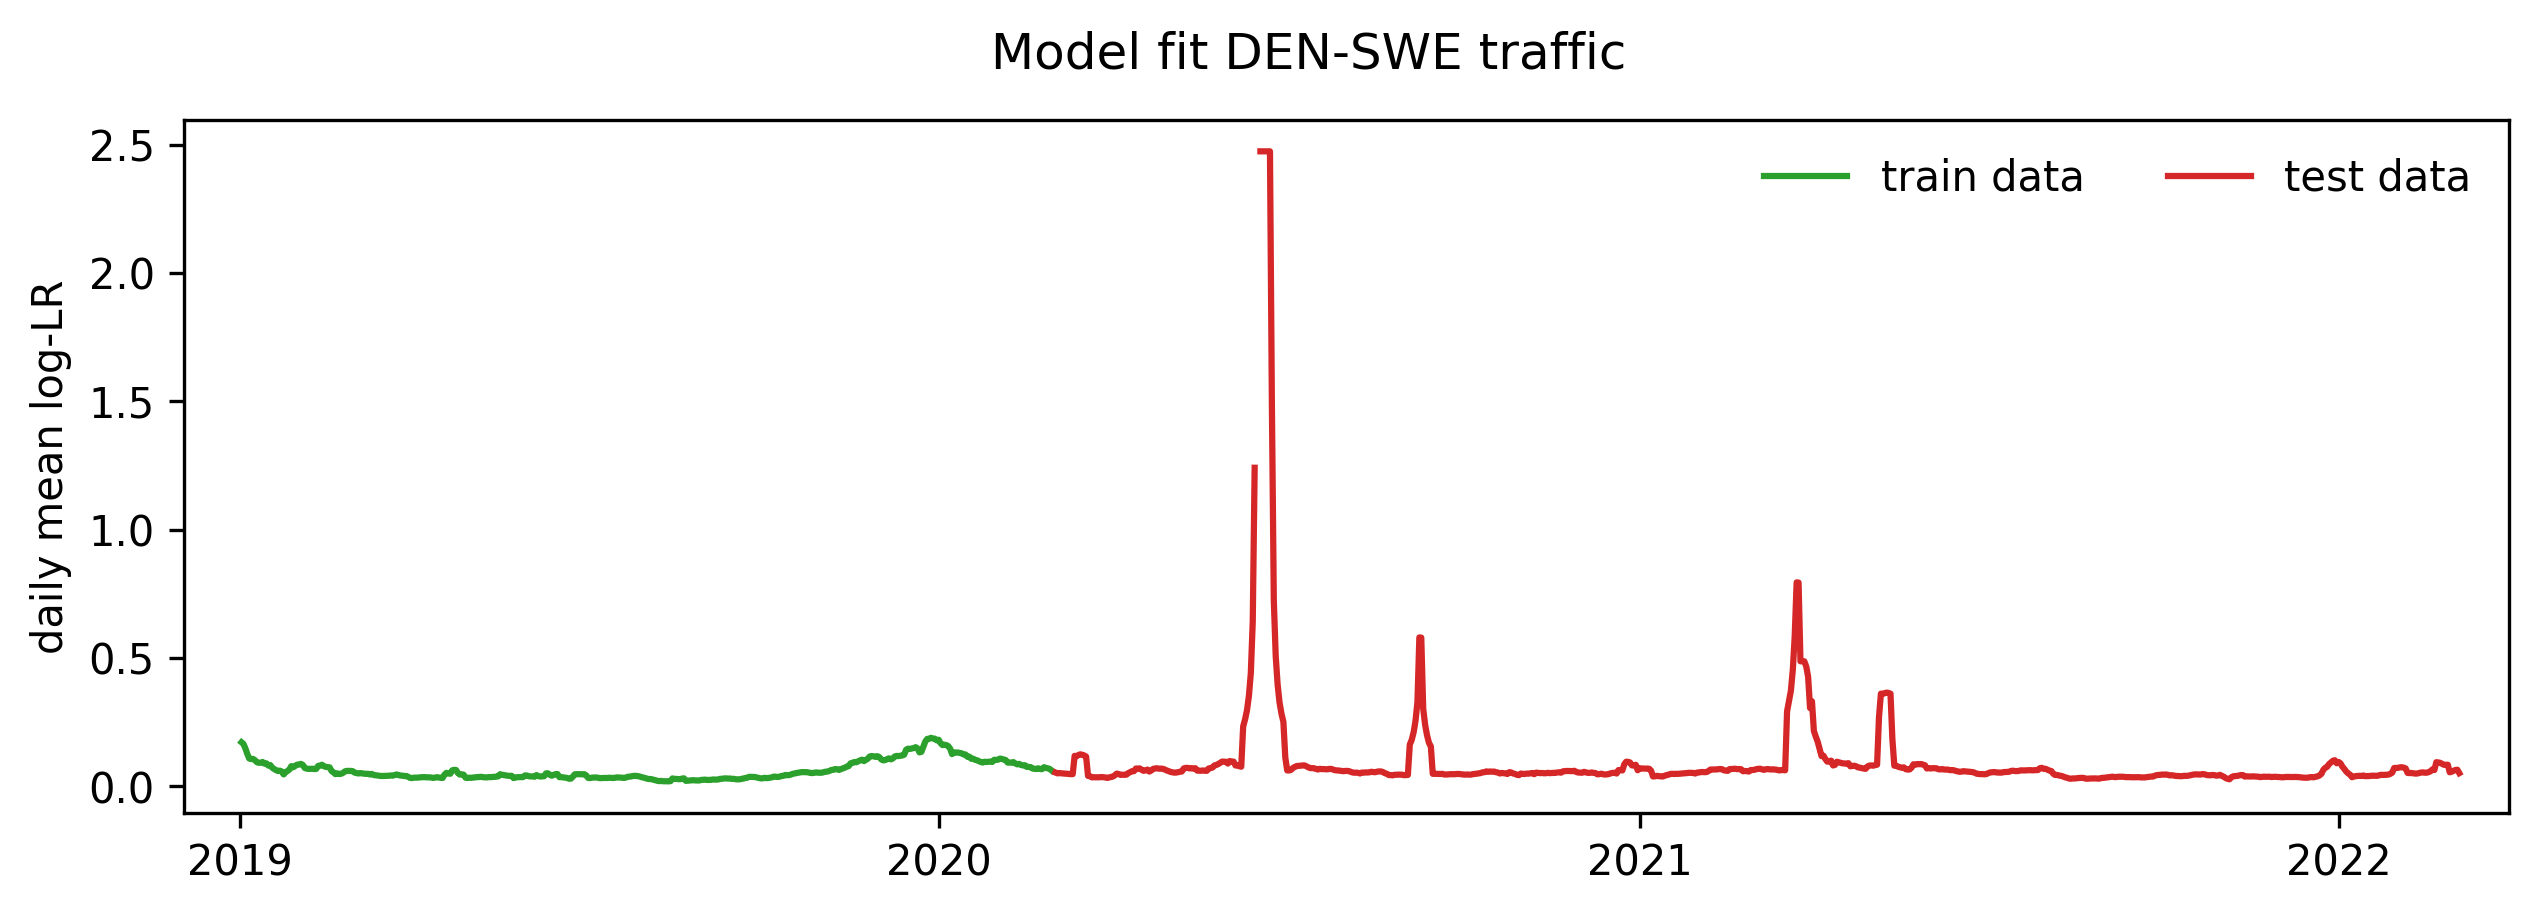

In [6]:
# Load evaluation and plot
eval_den_gmm = pd.read_pickle('../Data/eval_den_gmm_bayesian_KL.pkl')
utils.plot_evaluation_figure(eval_den_gmm,d1 = datetime.date(2017,1,1), d2 = datetime.date(2020,3,1), title = 'Model fit DEN-SWE traffic',xlim_min = datetime.date(2018,12,3), xlim_max = datetime.date(2022,3,31))

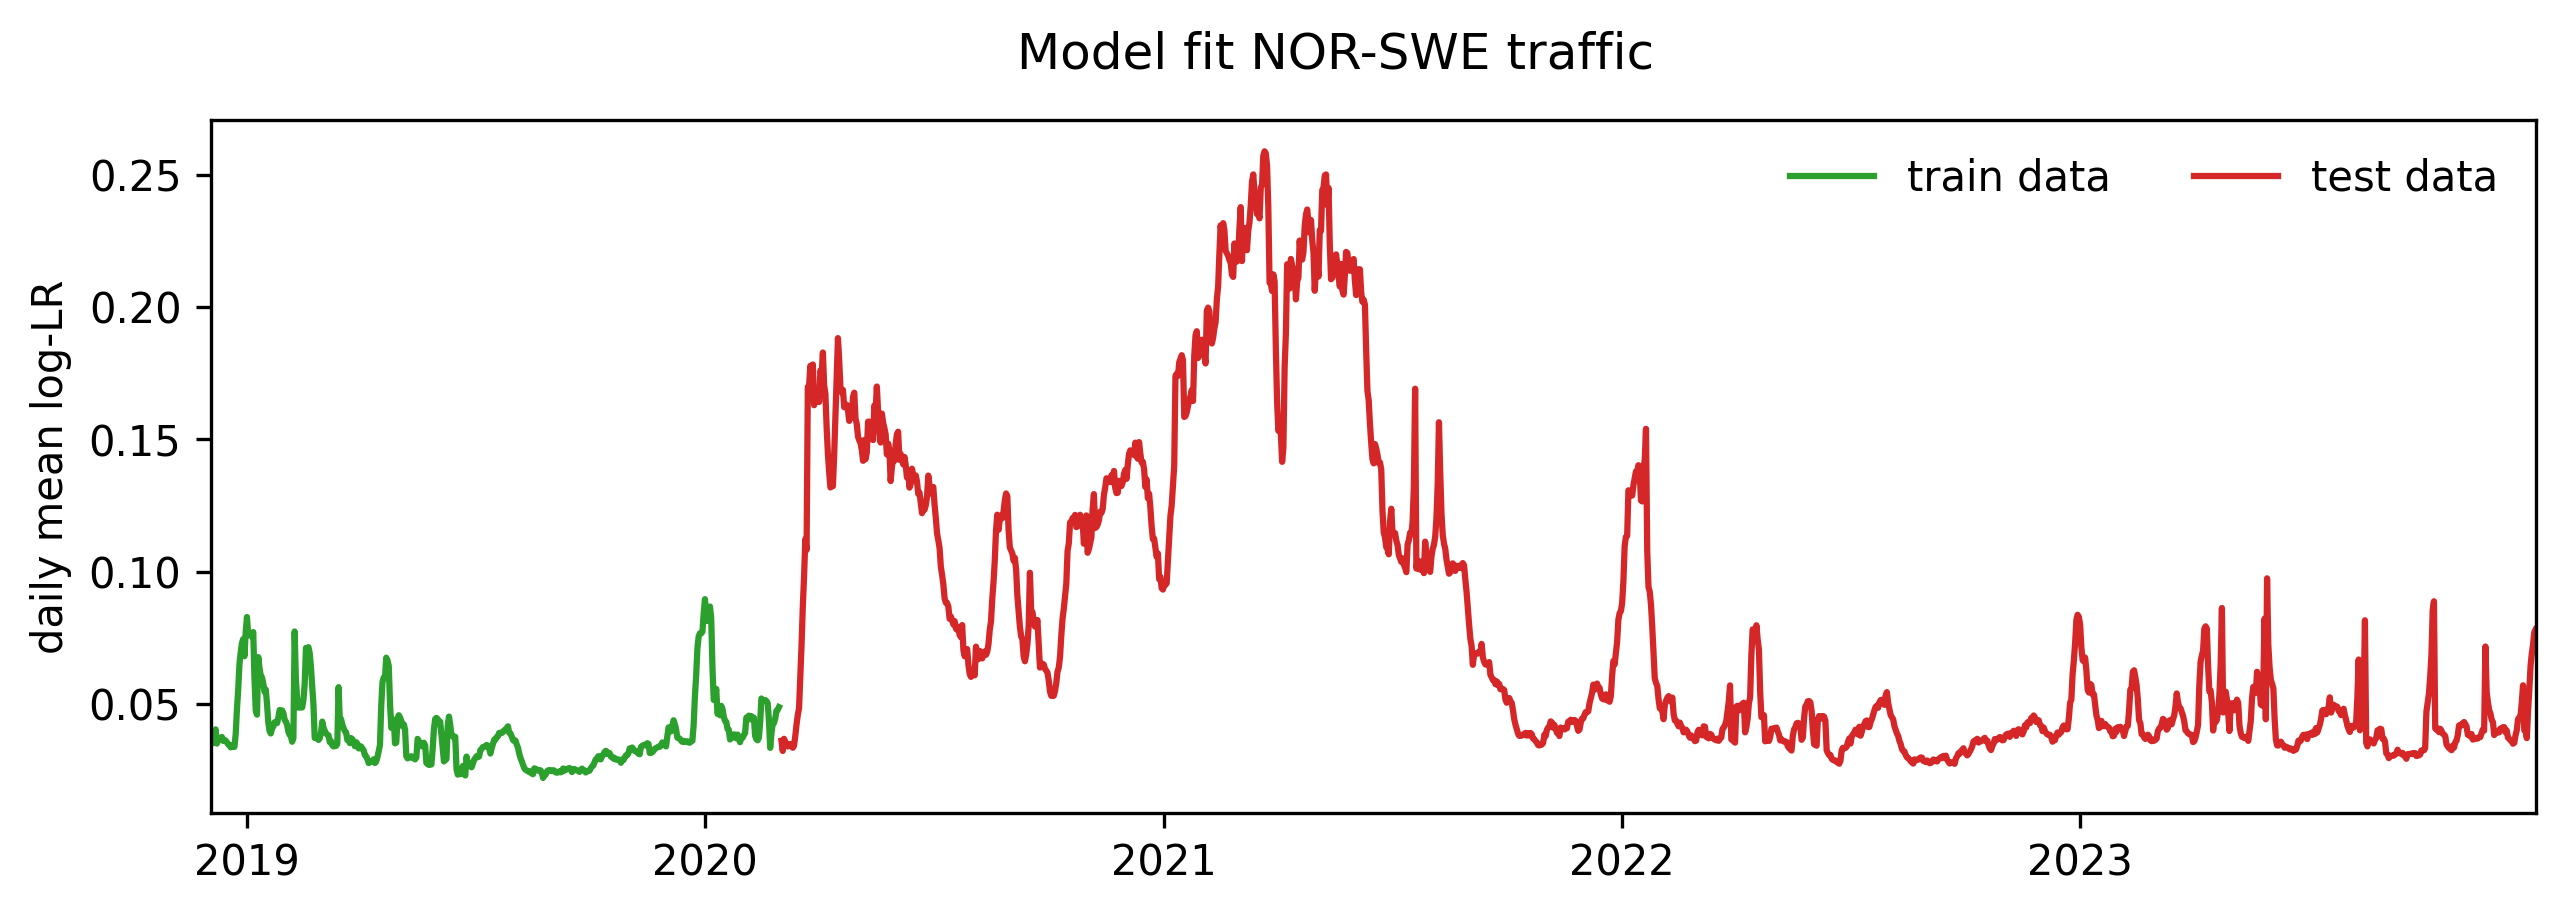

In [7]:
# Load evaluation and plot
eval_nor_gmm = pd.read_pickle('../Data/eval_nor_gmm_bayesian_KL.pkl')
utils.plot_evaluation_figure(eval_nor_gmm,d1 = datetime.date(2017,1,1), d2 = datetime.date(2020,3,1), title = 'Model fit NOR-SWE traffic',xlim_min = datetime.date(2018,12,3), xlim_max = datetime.date(2023,12,30))

### Extract commuting components

In [8]:
commuting_days = ["Mon", "Tue", "Wed", "Thu",'Fri']

start = 5.5
end = 10
w = 0

gauss_fin = models_fin.applymap(utils.get_gaussian_parameters)
dict_commute_fin = utils.find_possible_commuting_peaks(gauss_fin, commuting_days, allDays=True, start_morning = start*60, end_morning = end*60, w_morning = w, FINtime=True, hourminute=True)
 
gauss_nor = models_nor.applymap(utils.get_gaussian_parameters)
dict_commute_nor = utils.find_possible_commuting_peaks(gauss_nor, commuting_days, allDays=True, start_morning = start*60, end_morning = end*60, w_morning = w) 

gauss_den = models_den.applymap(utils.get_gaussian_parameters)
dict_commute_den = utils.find_possible_commuting_peaks(gauss_den, commuting_days, allDays=True, start_morning = start*60, end_morning = end*60, w_morning = w)

Plot estimated components for each sensor

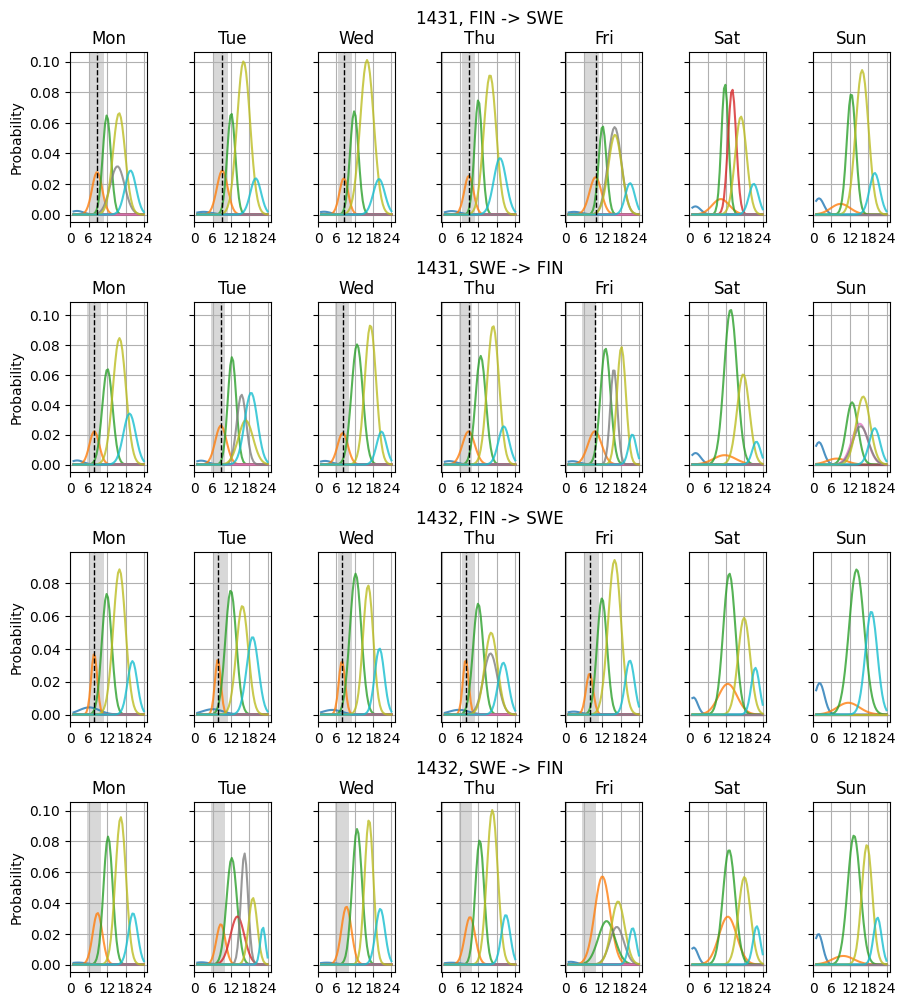

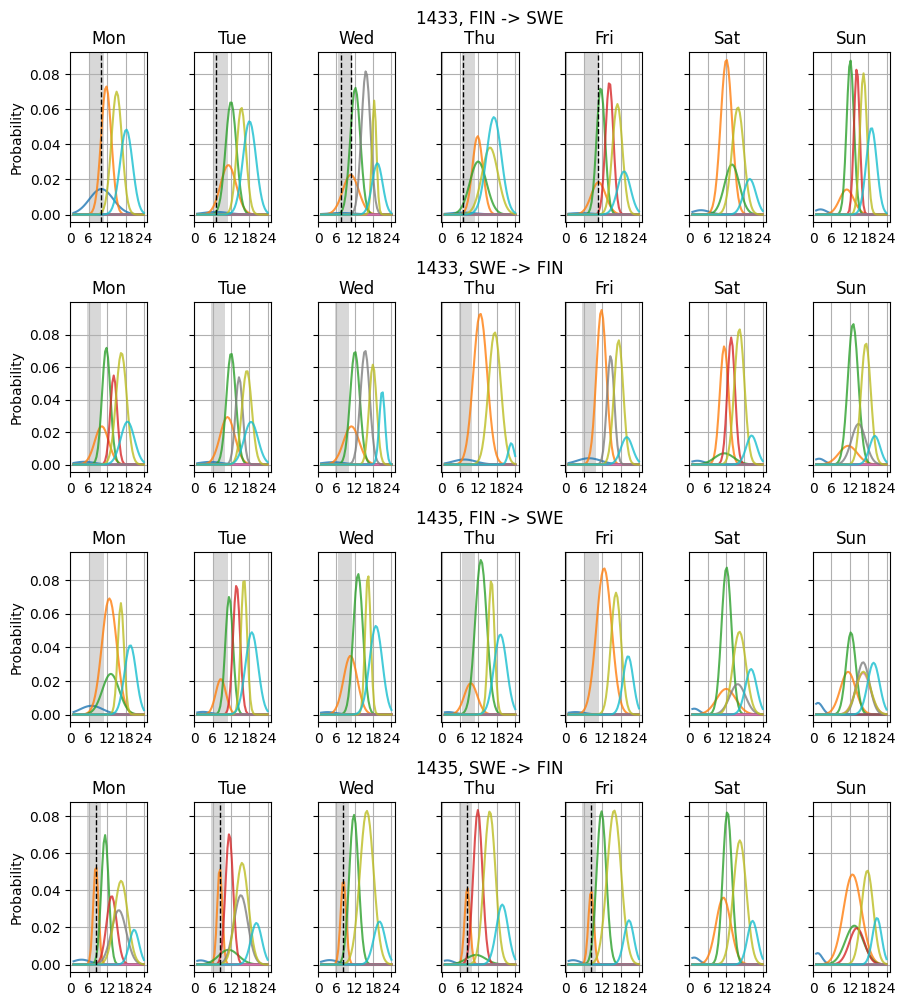

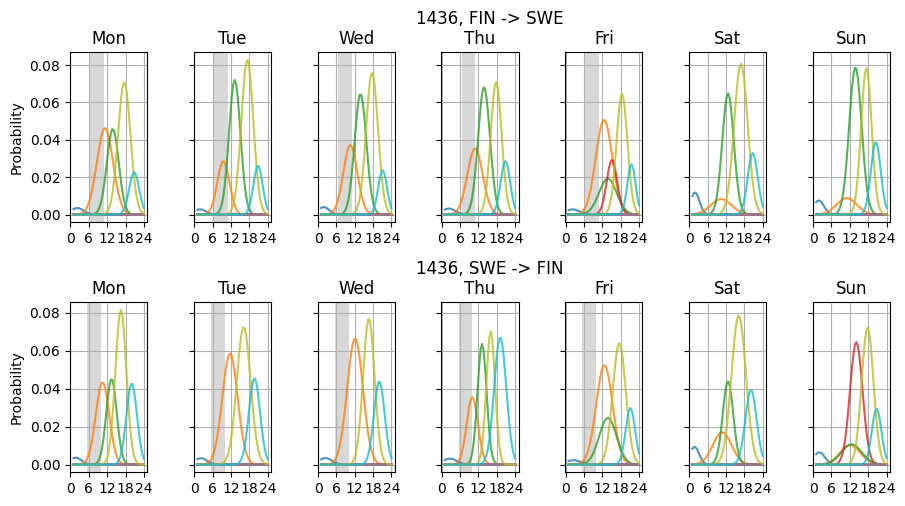

In [9]:
sensorlist = list(dict_commute_fin.keys())
plot_per_fig = 4
N_fig = int(np.ceil(len(sensorlist)/plot_per_fig))

for i in range(0,N_fig):
    s = i*plot_per_fig
    e = (i+1)*plot_per_fig
    utils.plot_components(sensorList = sensorlist[s:e],
                        models = models_fin,
                        morning_dict = dict_commute_fin,
                        CommutingDays = ["Mon", "Tue", "Wed", "Thu", "Fri"],
                        ShadedArea = True, Start = start, End = end, FINtime = True)
    
    #plt.savefig('../Figures/Supplementary/fin_swe_comp_' + str(i) + '.png', dpi = 300, bbox_inches='tight')
    #plt.savefig('../Figures/Supplementary/fin_swe_comp_' + str(i) + '.eps', dpi = 300, bbox_inches='tight')
    #plt.savefig('../Figures/Supplementary/fin_swe_comp_' + str(i) + '.tiff', dpi = 300, bbox_inches='tight')
    #plt.savefig('../Figures/Supplementary/fin_swe_comp_' + str(i) + '.pdf', dpi = 300, bbox_inches='tight')


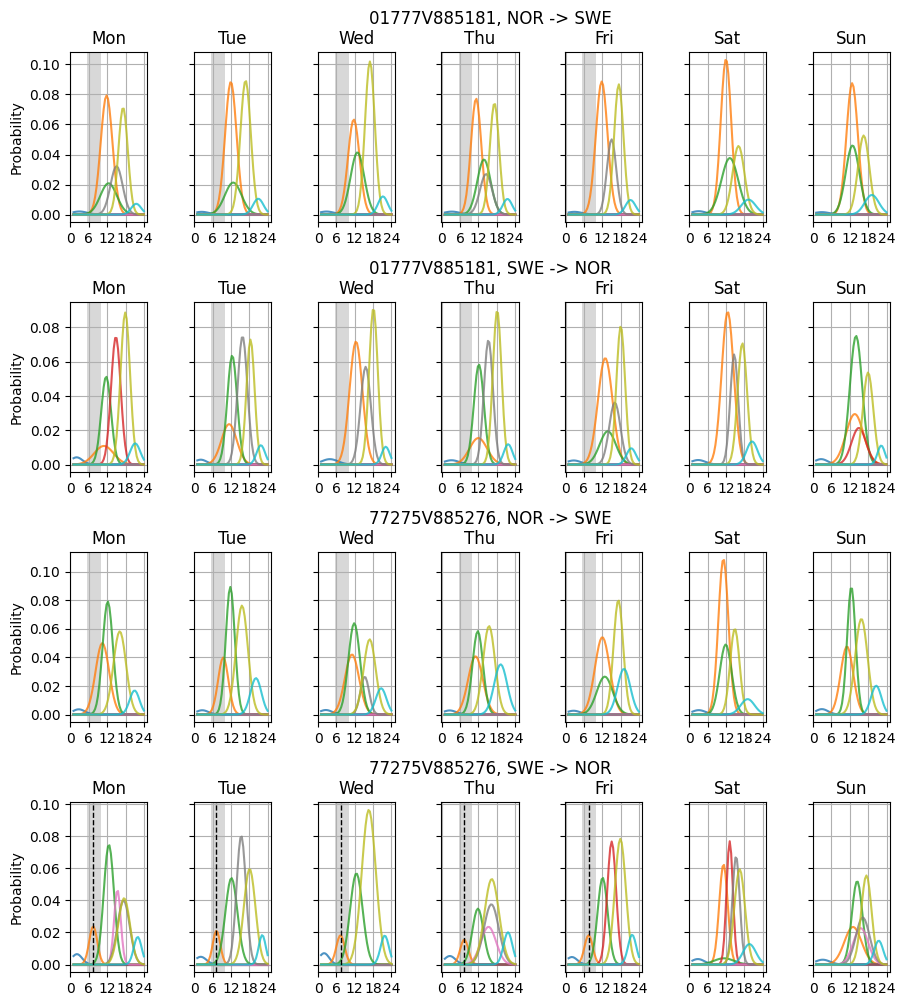

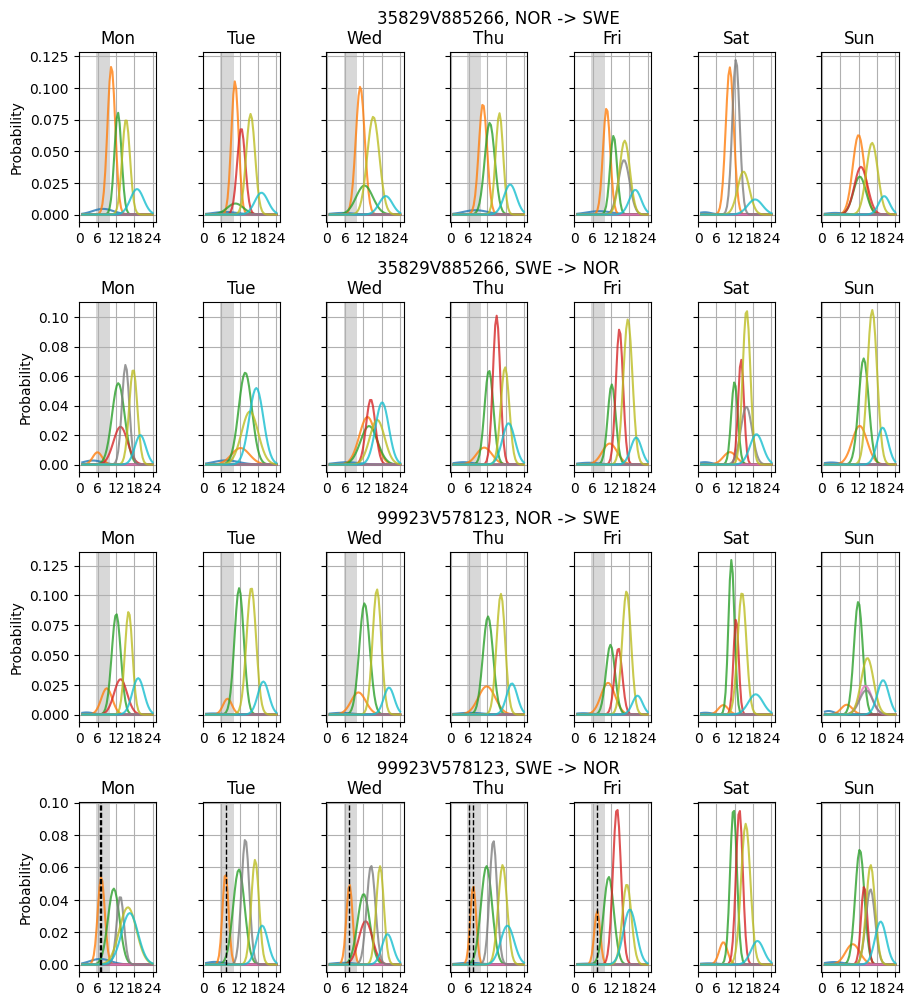

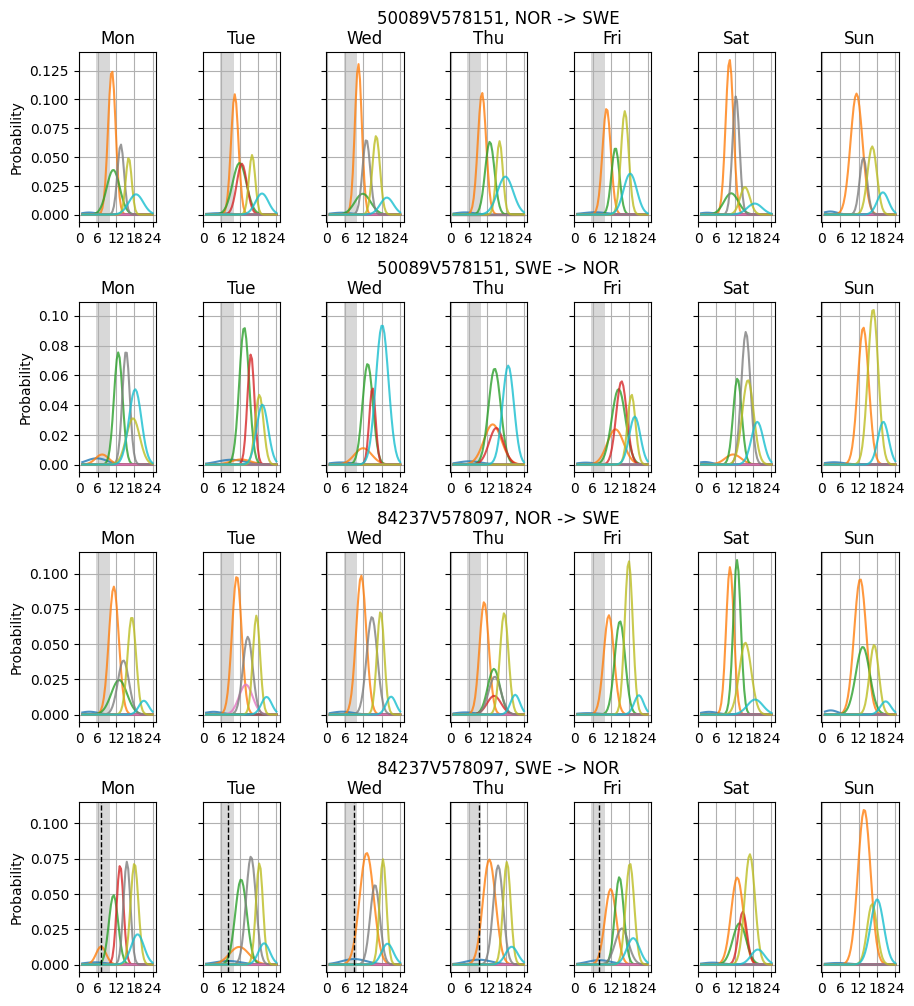

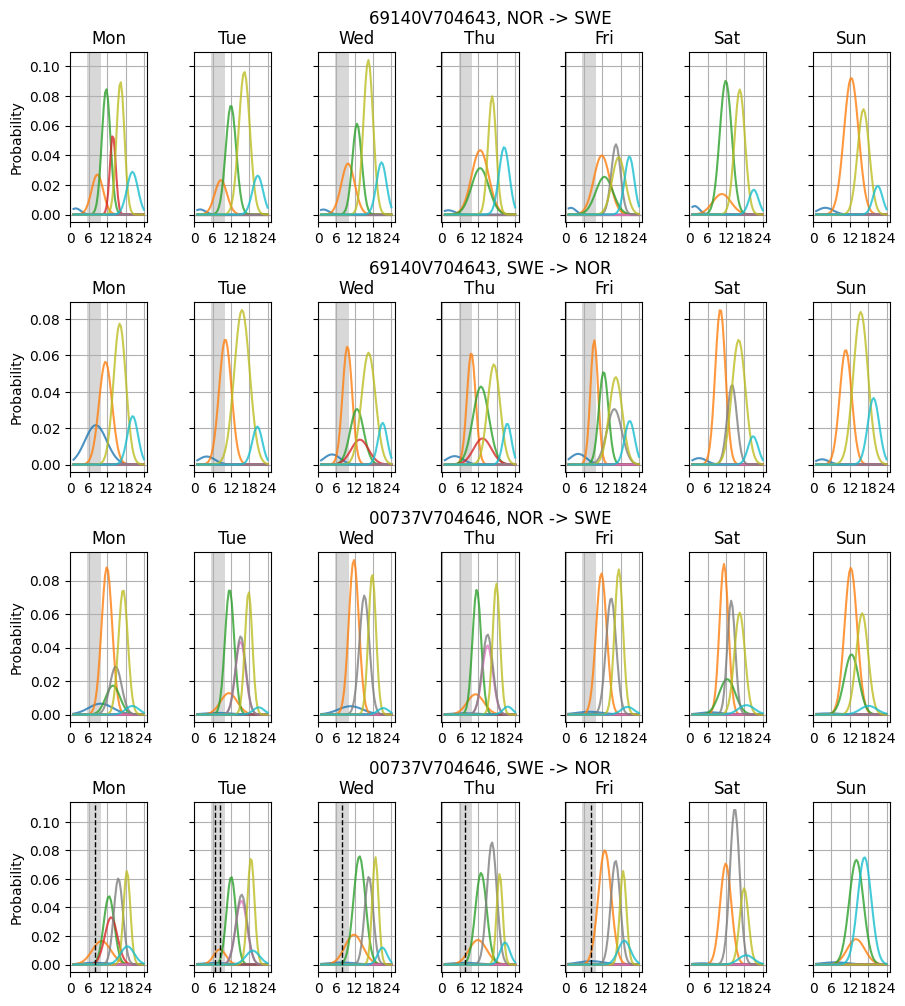

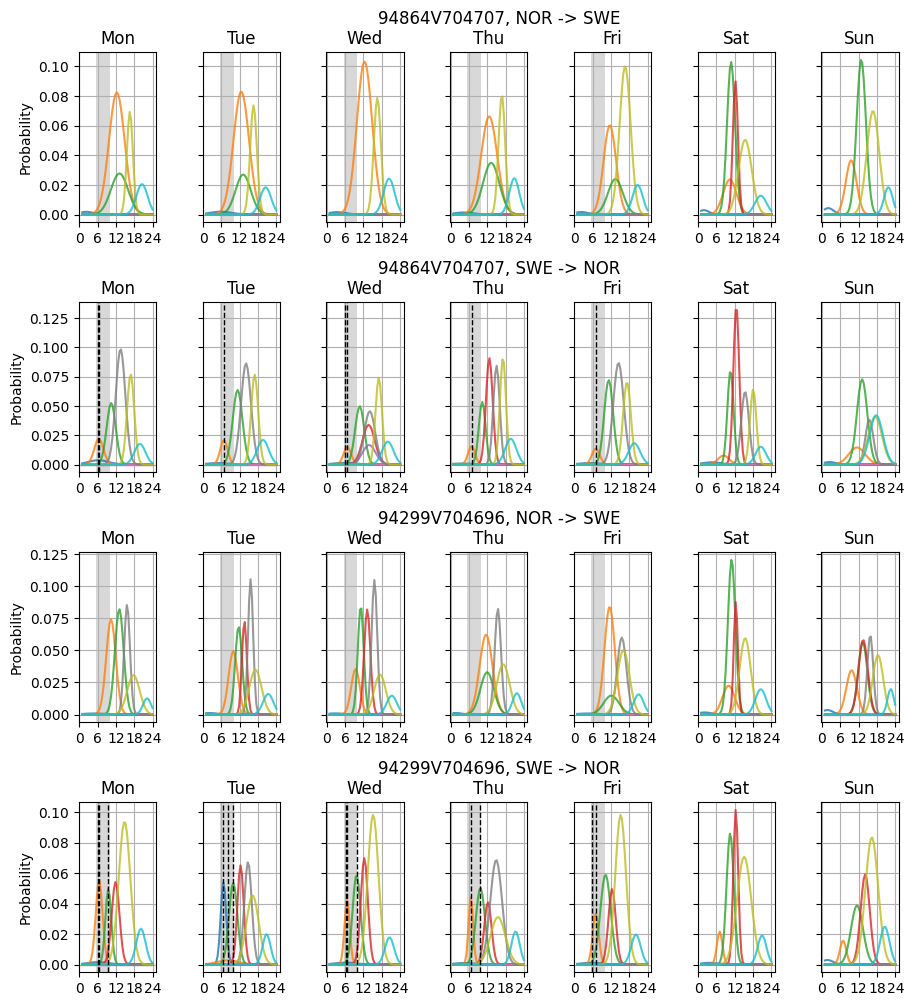

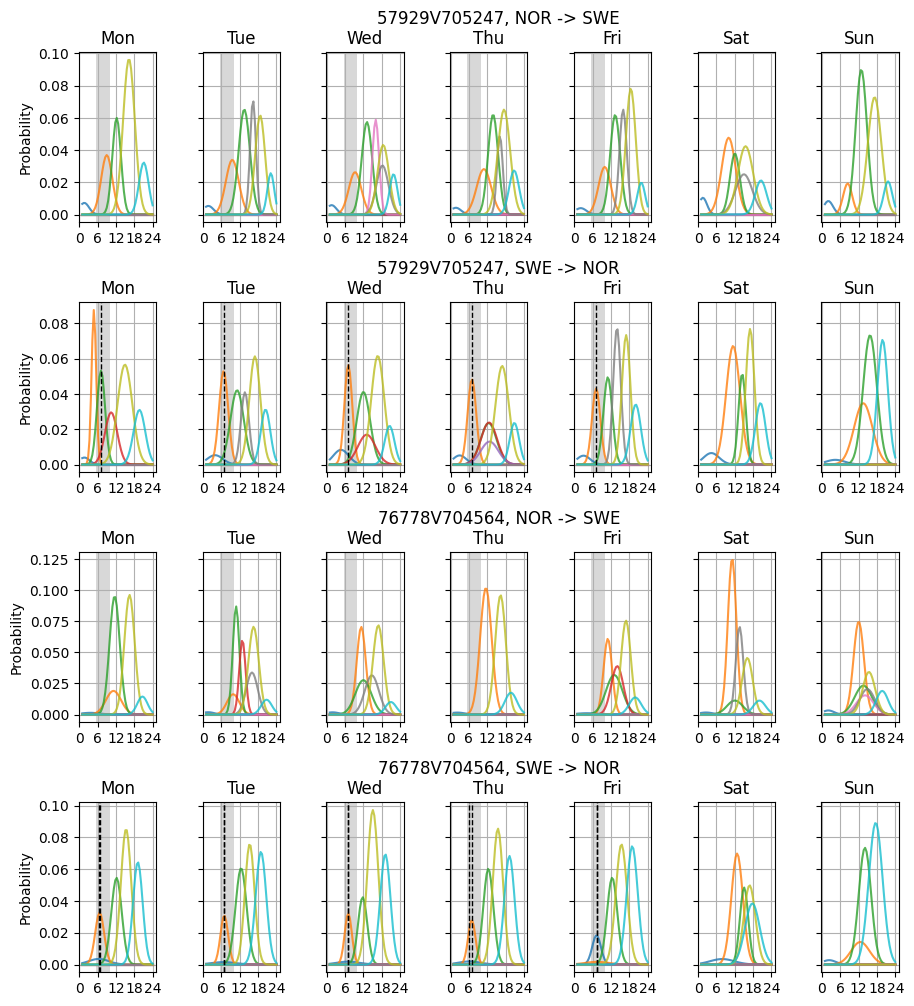

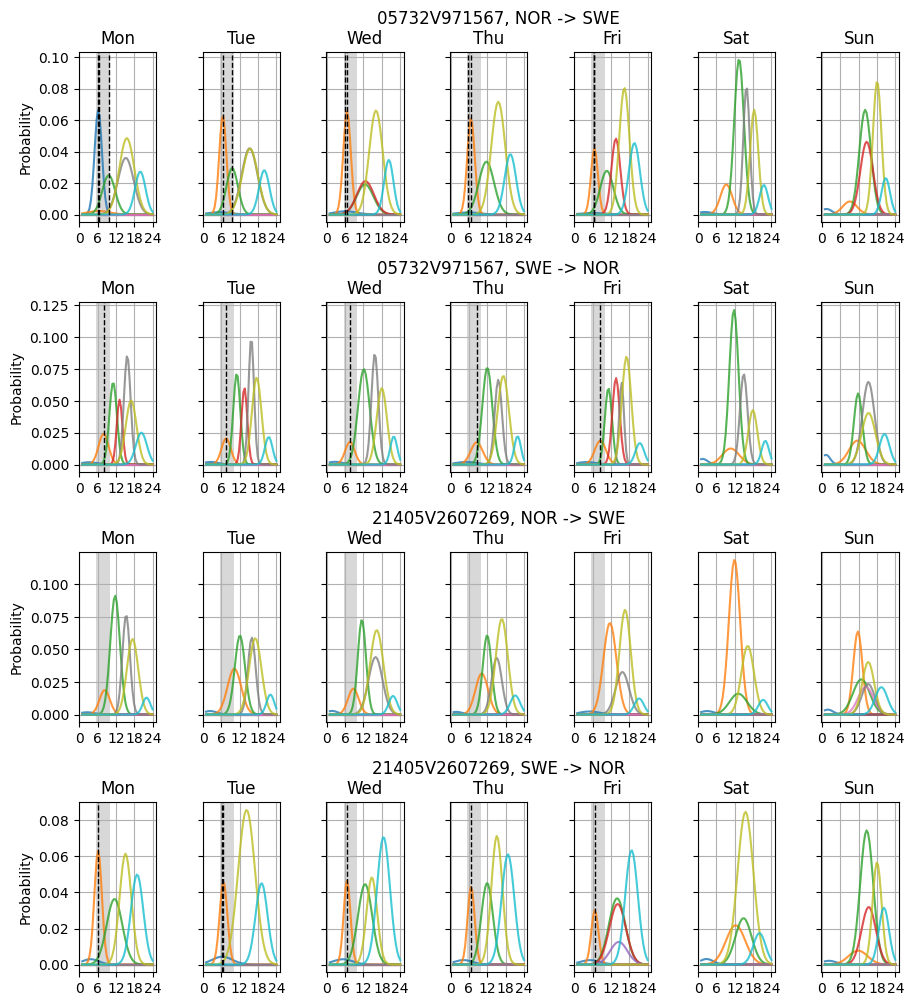

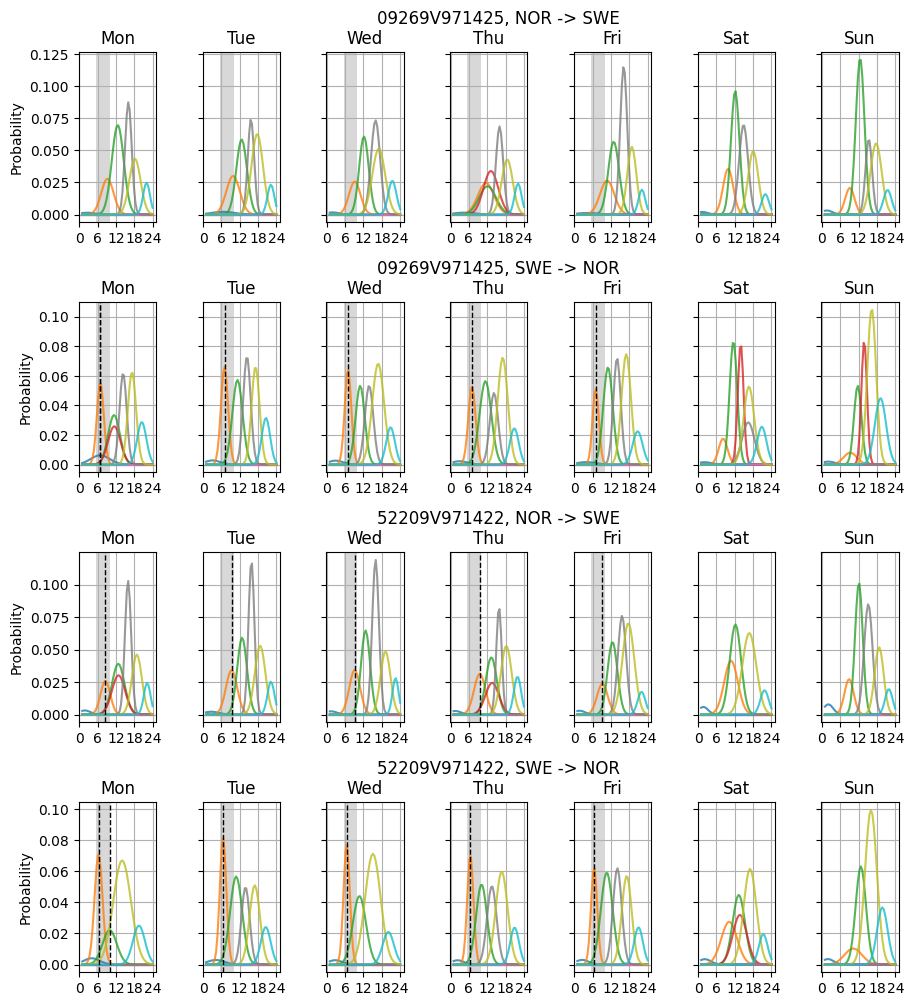

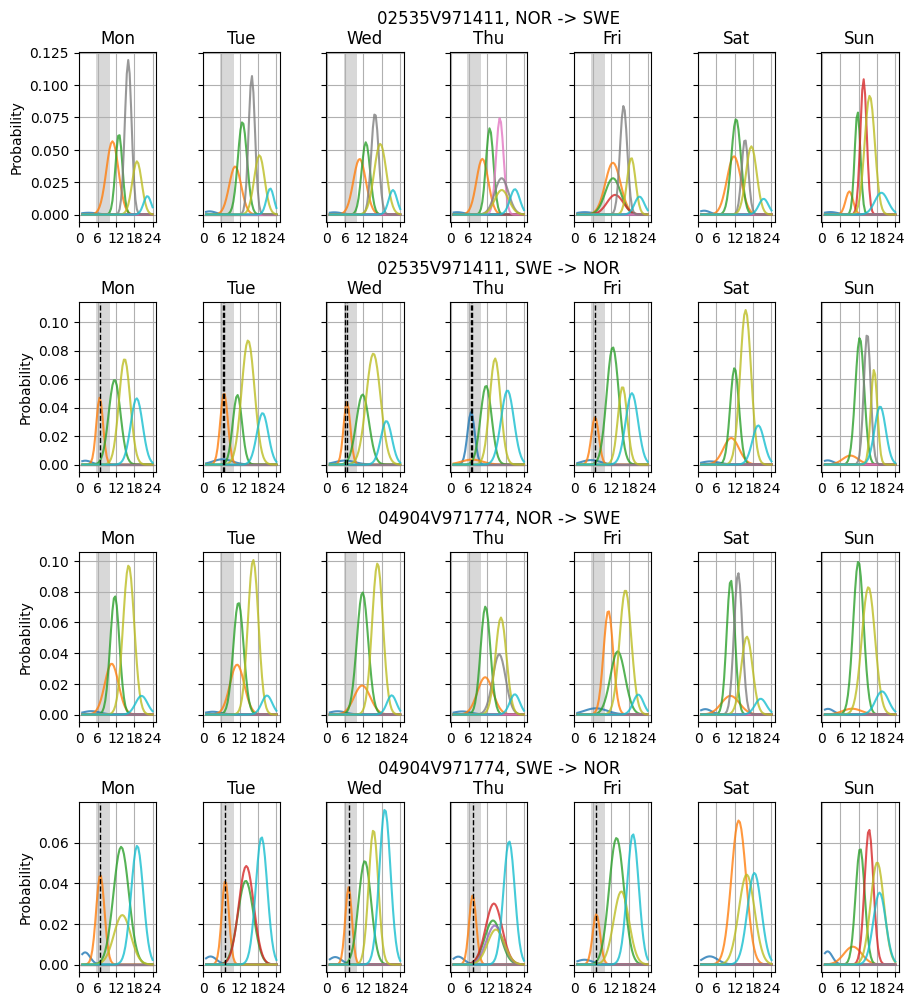

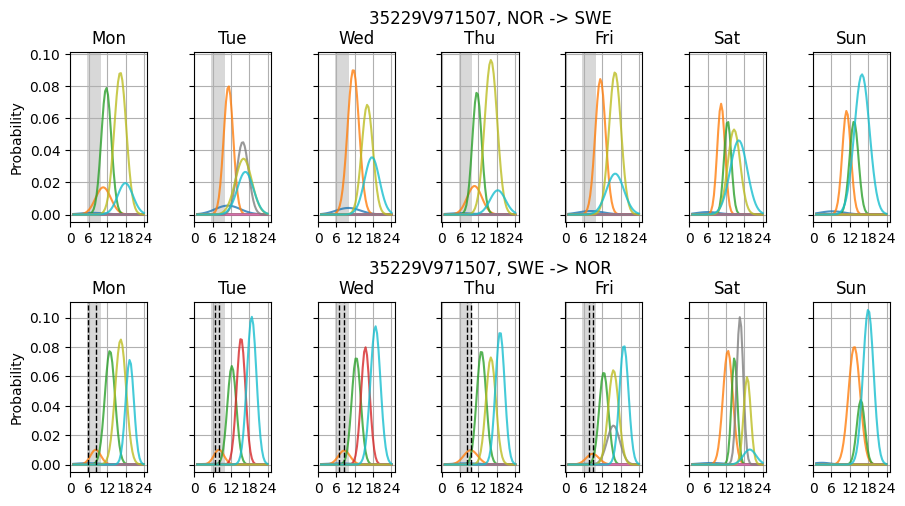

In [10]:
sensorlist = list(dict_commute_nor.keys())
step = 4
N = int(np.ceil(len(sensorlist)/step))

for i in range(0,N):
    s = i*step
    e = (i+1)*step
    utils.plot_components(sensorList = sensorlist[s:e],
                        models = models_nor,
                        morning_dict = dict_commute_nor,
                        CommutingDays = ["Mon", "Tue", "Wed", "Thu", "Fri"],
                        ShadedArea = True, Start = start, End = end, FINtime = False)
    #plt.savefig('../Figures/Supplementary/nor_swe_comp_' + str(i) + '.png', dpi = 300, bbox_inches='tight')
    #plt.savefig('../Figures/Supplementary/nor_swe_comp_' + str(i) + '.eps', dpi = 300, bbox_inches='tight')
    #plt.savefig('../Figures/Supplementary/nor_swe_comp_' + str(i) + '.tiff', dpi = 300, bbox_inches='tight')
    #plt.savefig('../Figures/Supplementary/nor_swe_comp_' + str(i) + '.pdf', dpi = 300, bbox_inches='tight')

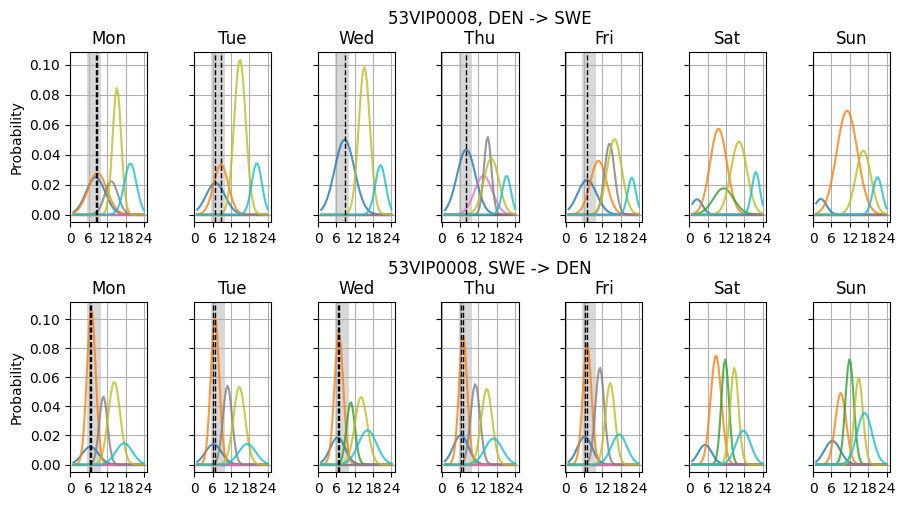

In [11]:
sensorlist = list(dict_commute_den.keys())

utils.plot_components(sensorList = sensorlist,
                      models = models_den,
                      morning_dict = dict_commute_den,
                      CommutingDays = ["Mon", "Tue", "Wed", "Thu", "Fri"],
                      ShadedArea = True, Start = start, End = end, FINtime = False, Correct_denswe=False)
#plt.savefig('../Figures/Supplementary/den_swe_comp_' + str(1) + '.png', dpi = 300, bbox_inches='tight')
#plt.savefig('../Figures/Supplementary/den_swe_comp_' + str(1) + '.eps', dpi = 300, bbox_inches='tight')
#plt.savefig('../Figures/Supplementary/den_swe_comp_' + str(1) + '.tiff', dpi = 300, bbox_inches='tight')
#plt.savefig('../Figures/Supplementary/den_swe_comp_' + str(1) + '.pdf', dpi = 300, bbox_inches='tight')


### Estimate number of commuters by hour

In [68]:

# Takes about 16 mins for 2017-2023
data_commute_fin = utils.estimate_number_of_commuters_over_time(agg_fin, models_fin, commuting_days, dict_commute_fin, hourminute = True) # compute number of commuters by sensor and hour
data_commute_nor = utils.estimate_number_of_commuters_over_time(agg_nor, models_nor, commuting_days, dict_commute_nor, hourminute = True) # compute number of commuters by sensor and hour
data_commute_den = utils.estimate_number_of_commuters_over_time(agg_den, models_den, commuting_days, dict_commute_den, hourminute = True) # compute number of commuters by sensor and hour

data_commute_fin.to_pickle('../Data/data_commute_fin_to10.pkl')
data_commute_nor.to_pickle('../Data/data_commute_nor_to10.pkl')
data_commute_den.to_pickle('../Data/data_commute_den_to10.pkl')

In [12]:
# Use this to load data 
data_commute_fin = pd.read_pickle('../Data/data_commute_fin_to10.pkl')
data_commute_nor = pd.read_pickle('../Data/data_commute_nor_to10.pkl')
data_commute_den = pd.read_pickle('../Data/data_commute_den_to10.pkl')

### Combine over sensors

In [13]:
def data_to_daily(d):
    # d is the output from estimate_number_of_commuters_over_time()
    
    d = d.groupby(['sensor_origin','sensor_destination','new_date'])[['ShortTerm','total_vehicles']].sum(min_count = 1).reset_index(level = 'new_date')
    d['ShortTerm'] = d['ShortTerm'].astype(int)
    d['total_vehicles'] = d['total_vehicles'].astype(int)
    
    return(d)

def sensor_to_country(x):
    original_sensors = x.index.values
    sensors = [i[0].split(', ')[0] for i in original_sensors]
    origins = [i[0].split(', ')[1] for i in original_sensors]
    destinations = [i[1].split(', ')[1] for i in original_sensors]
    
    x['from_to'] = [i[0] + '>' + i[1] for i in zip(origins,destinations)]
    
    x = x.groupby(['new_date','from_to']).sum().reset_index()
    
    return(x)

In [14]:
daily_fin = data_to_daily(data_commute_fin) # daily data for each sensor
daily_nor = data_to_daily(data_commute_nor) # daily data for each sensor
daily_den = data_to_daily(data_commute_den) # daily data for each sensor


In [15]:
def weekinfo_and_summarize(daily):
    # Add weekday/holiday identifier and summarize weekly
    data_commute_country = sensor_to_country(daily) # Daily data on country level
    data_commute_country['new_date'] = pd.to_datetime(data_commute_country['new_date'])
    data_commute_country['weekday'] = data_commute_country.new_date.dt.weekday.map(dict(zip([0,1,2,3,4,5,6],["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])))
    data_commute_country['day_type'] = data_commute_country['weekday'].isin(commuting_days)
    data_commute_country['day_type'] = np.where(data_commute_country['day_type']== True, 'Weekday','Holiday')
    data_commute_country['week'] = data_commute_country.new_date.dt.isocalendar().week
    data_commute_country['year'] = data_commute_country.new_date.dt.year
    data_commute_country['week_year'] = data_commute_country['week'].astype(str) + '_' + data_commute_country['year'].astype(str)

    # Mean number of vehicles within a week, computed for weekdays and holidays separately.
    WeeklySum_short = data_commute_country.groupby(['from_to','day_type','week','year'])['ShortTerm'].sum().rename('ShortTerm_WeeklySum').reset_index()
    WeeklyMean_short = data_commute_country.groupby(['from_to','day_type','week','year'])['ShortTerm'].mean().rename('ShortTerm_WeeklyMean').reset_index()

    # Mean number of vehicles within a week, using all seven days of the week.
    WeeklySum_all = data_commute_country.groupby(['from_to','week','year'])['total_vehicles'].sum().rename('total_vehicles_WeeklySum').reset_index()
    WeeklyMean_all = data_commute_country.groupby(['from_to','week','year'])['total_vehicles'].mean().rename('total_vehicles_WeeklyMean').reset_index()

    data_commute_country = data_commute_country.merge(WeeklySum_short,how = 'left', on = ['from_to','week','year','day_type']).merge(WeeklyMean_short,how = 'left', on = ['from_to','week','year','day_type'])
    data_commute_country = data_commute_country.merge(WeeklySum_all,how = 'left', on = ['from_to','week','year']).merge(WeeklyMean_all,how = 'left', on = ['from_to','week','year'])

    data_commute_country['ShortTermFraction'] = data_commute_country['ShortTerm']/data_commute_country['total_vehicles']
    data_commute_country['ShortTerm_WeeklyMean_Fraction'] = data_commute_country['ShortTerm_WeeklyMean']/data_commute_country['total_vehicles_WeeklyMean']
    data_commute_country['ShortTerm_WeeklySum_Fraction'] = data_commute_country['ShortTerm_WeeklySum']/data_commute_country['total_vehicles_WeeklySum']

    # The baseline is then 
    baseline_short = data_commute_country[np.logical_and(data_commute_country['new_date']>datetime.datetime(2019,1,5),data_commute_country['new_date']<datetime.datetime(2020,3,5))].groupby(['from_to','day_type'])['ShortTerm_WeeklyMean'].mean().rename('baseline_short').reset_index()
    baseline_all = data_commute_country[np.logical_and(data_commute_country['new_date']>datetime.datetime(2019,1,5),data_commute_country['new_date']<datetime.datetime(2020,3,5))].groupby(['from_to'])['total_vehicles_WeeklyMean'].mean().rename('baseline_all').reset_index()
    

    data_commute_country = data_commute_country.merge(baseline_short,how = 'left', on = ['from_to','day_type']).merge(baseline_all,how = 'left', on = ['from_to'])
    data_commute_country['ShortTerm_relative'] = data_commute_country['ShortTerm_WeeklyMean']/data_commute_country['baseline_short']
    data_commute_country['total_relative'] = data_commute_country['total_vehicles_WeeklyMean']/data_commute_country['baseline_all']

    return(data_commute_country, baseline_all, baseline_short)



In [16]:
#commuting_days = ["Mon", "Tue", "Wed", "Thu", "Fri"] # Remember to update this in the function above if commuting days are different.
daily_commute_fin, base_all_fin, base_short_fin = weekinfo_and_summarize(daily_fin)
daily_commute_nor, base_all_nor, base_short_nor = weekinfo_and_summarize(daily_nor)
daily_commute_den, base_all_den, base_short_den = weekinfo_and_summarize(daily_den)

## Annual commuters
The annual number of commuters and fraction of overall traffic. Prints LaTeX table formated code

In [17]:
annual_fin = daily_commute_fin.copy()
annual_fin['from_to'] = annual_fin['from_to'].replace('>', " to ", regex = True)
annual_fin = annual_fin.rename(columns={'from_to':"From - To"})
annual_fin = annual_fin.groupby(['year','From - To'])[['ShortTerm','total_vehicles']].sum()
annual_fin['Fraction'] = annual_fin['ShortTerm']/annual_fin['total_vehicles']*100
annual_fin = annual_fin.rename(columns = {'total_vehicles':'Total'})


print(annual_fin.to_latex(index = True, float_format="{:.3f}".format, formatters={"ShortTerm":format('{:,}'),
                                                                                  "Total":format('{:,}')}))

annual_fin = annual_fin.reset_index()

\begin{tabular}{llrrr}
\toprule
 &  & ShortTerm & Total & Fraction \\
year & From - To &  &  &  \\
\midrule
\multirow[t]{2}{*}{2017} & FIN to SWE & 142,536 & 2,065,088 & 6.902 \\
 & SWE to FIN & 119,889 & 2,121,305 & 5.652 \\
\cline{1-5}
\multirow[t]{2}{*}{2018} & FIN to SWE & 146,095 & 2,107,492 & 6.932 \\
 & SWE to FIN & 124,779 & 2,178,303 & 5.728 \\
\cline{1-5}
\multirow[t]{2}{*}{2019} & FIN to SWE & 149,432 & 2,164,330 & 6.904 \\
 & SWE to FIN & 127,787 & 2,254,932 & 5.667 \\
\cline{1-5}
\multirow[t]{2}{*}{2020} & FIN to SWE & 100,136 & 1,102,641 & 9.081 \\
 & SWE to FIN & 46,325 & 726,997 & 6.372 \\
\cline{1-5}
\multirow[t]{2}{*}{2021} & FIN to SWE & 98,635 & 1,010,821 & 9.758 \\
 & SWE to FIN & 46,497 & 524,913 & 8.858 \\
\cline{1-5}
\multirow[t]{2}{*}{2022} & FIN to SWE & 131,695 & 1,821,105 & 7.232 \\
 & SWE to FIN & 103,701 & 1,759,099 & 5.895 \\
\cline{1-5}
\multirow[t]{2}{*}{2023} & FIN to SWE & 148,768 & 2,138,653 & 6.956 \\
 & SWE to FIN & 123,471 & 2,147,101 & 5.751 \\
\

In [18]:
annual_nor = daily_commute_nor.copy()
annual_nor['from_to'] = annual_nor['from_to'].replace('>', " to ", regex = True)
annual_nor = annual_nor.rename(columns={'from_to':"From - To"})
annual_nor = annual_nor.groupby(['year','From - To'])[['ShortTerm','total_vehicles']].sum()
annual_nor['Fraction'] = annual_nor['ShortTerm']/annual_nor['total_vehicles']*100
annual_nor = annual_nor.rename(columns = {'total_vehicles':'Total'})


print(annual_nor.to_latex(index = True, float_format="{:.3f}".format, formatters={"ShortTerm":format('{:,}'),
                                                                                  "Total":format('{:,}')}))

annual_nor = annual_nor.reset_index()

\begin{tabular}{llrrr}
\toprule
 &  & ShortTerm & Total & Fraction \\
year & From - To &  &  &  \\
\midrule
\multirow[t]{2}{*}{2017} & NOR to SWE & 4,594 & 5,818,150 & 0.079 \\
 & SWE to NOR & 391,935 & 5,969,394 & 6.566 \\
\cline{1-5}
\multirow[t]{2}{*}{2018} & NOR to SWE & 19,887 & 6,157,074 & 0.323 \\
 & SWE to NOR & 405,850 & 6,313,370 & 6.428 \\
\cline{1-5}
\multirow[t]{2}{*}{2019} & NOR to SWE & 16,414 & 7,349,516 & 0.223 \\
 & SWE to NOR & 479,105 & 7,308,232 & 6.556 \\
\cline{1-5}
\multirow[t]{2}{*}{2020} & NOR to SWE & 13,759 & 2,717,496 & 0.506 \\
 & SWE to NOR & 351,657 & 2,617,377 & 13.435 \\
\cline{1-5}
\multirow[t]{2}{*}{2021} & NOR to SWE & 8,648 & 2,412,747 & 0.358 \\
 & SWE to NOR & 389,374 & 2,694,186 & 14.452 \\
\cline{1-5}
\multirow[t]{2}{*}{2022} & NOR to SWE & 18,869 & 6,081,545 & 0.310 \\
 & SWE to NOR & 487,636 & 6,450,770 & 7.559 \\
\cline{1-5}
\multirow[t]{2}{*}{2023} & NOR to SWE & 18,646 & 5,338,663 & 0.349 \\
 & SWE to NOR & 400,290 & 5,620,038 & 7.123 \\
\

In [19]:
annual_den = daily_commute_den.copy()

annual_den['from_to'] = annual_den['from_to'].replace('>', " - ", regex = True)
annual_den = annual_den.rename(columns={'from_to':"From - To"})
annual_den = annual_den.groupby(['year','From - To'])[['ShortTerm','total_vehicles']].sum()
annual_den['Fraction'] = annual_den['ShortTerm']/annual_den['total_vehicles']*100
annual_den = annual_den.rename(columns = {'total_vehicles':'Total'})
#annual_den['From - To'] = np.where(annual_den['From - To'] == 'DEN - SWE', 'SWE- DEN', 'DEN - SWE') # Comment out this line if direction in den-swe data is correct in file


print(annual_den.to_latex(index = True, float_format="{:.3f}".format, formatters={"ShortTerm":format('{:,}'),
                                                                                  "Total":format('{:,}')}))

annual_den = annual_den.reset_index()

\begin{tabular}{llrrr}
\toprule
 &  & ShortTerm & Total & Fraction \\
year & From - To &  &  &  \\
\midrule
\multirow[t]{2}{*}{2019} & DEN - SWE & 1,013,400 & 3,992,492 & 25.383 \\
 & SWE - DEN & 1,210,480 & 3,717,096 & 32.565 \\
\cline{1-5}
\multirow[t]{2}{*}{2020} & DEN - SWE & 583,945 & 2,213,386 & 26.382 \\
 & SWE - DEN & 710,470 & 2,130,996 & 33.340 \\
\cline{1-5}
\multirow[t]{2}{*}{2021} & DEN - SWE & 638,635 & 2,358,848 & 27.074 \\
 & SWE - DEN & 803,128 & 2,400,341 & 33.459 \\
\cline{1-5}
\multirow[t]{2}{*}{2022} & DEN - SWE & 90,931 & 412,896 & 22.023 \\
 & SWE - DEN & 140,733 & 434,170 & 32.414 \\
\cline{1-5}
\bottomrule
\end{tabular}



Figure for barplot of annual commuters

Text(0.02, 0.5, 'Annual commuting vehicles, % of total traffic')

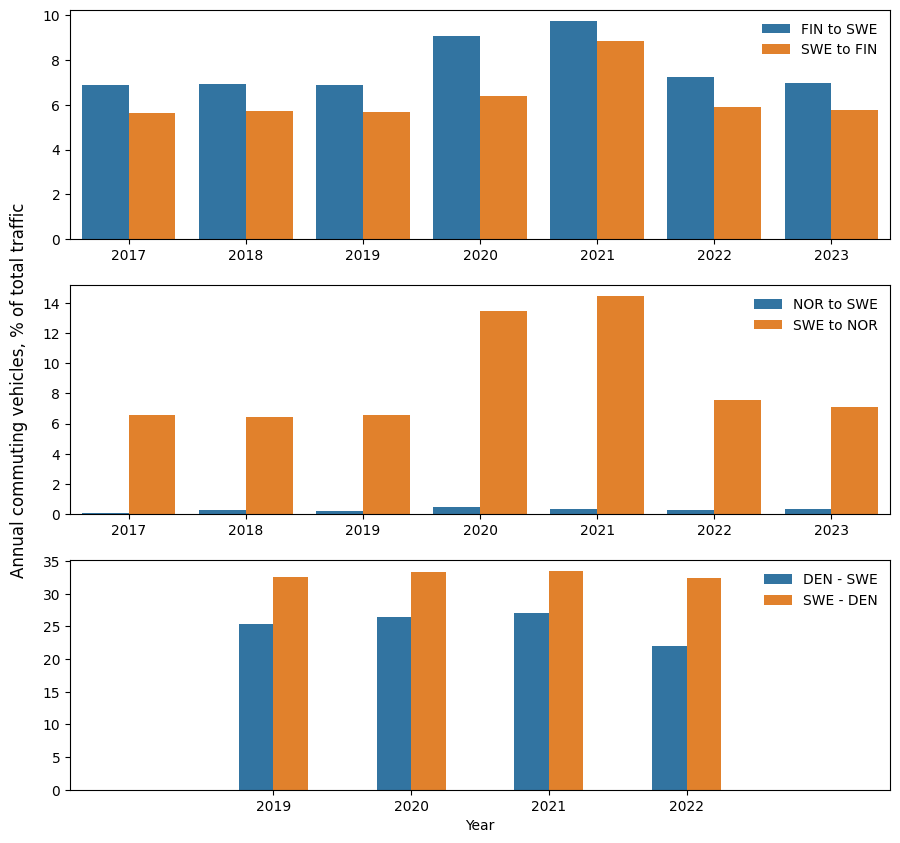

In [20]:
fig, ax = plt.subplots(3,1, sharey = False, figsize = (10,10))

fig.subplots_adjust(hspace=.2, bottom = 0.10, left = 0.08)

# FIN SWE
sns.barplot(data = annual_fin, x = 'year', y = 'Fraction', hue = 'From - To',ax = ax[0])
ax[0].set_xlabel(' ')
ax[0].set_ylabel(' ')
ax[0].legend(frameon=False,loc = 1).set_title('')


sns.barplot(data = annual_nor, x = 'year', y = 'Fraction', hue = 'From - To',ax = ax[1])
ax[1].set_xlabel(' ')
ax[1].set_ylabel(' ')
ax[1].legend(frameon=False,loc = 1).set_title('')



sns.barplot(data = annual_den, x = 'year', y = 'Fraction', hue = 'From - To',ax = ax[2], width=0.5)
ax[2].set_xlabel('Year')
ax[2].set_ylabel(' ')
ax[2].legend(frameon=False,loc = 1).set_title('')
ax[2].margins(x = 0.35)


fig.supylabel('Annual commuting vehicles, % of total traffic')



#plt.savefig('../Figures/Supplementary/Annual_commuterFrac.png', dpi = 300, bbox_inches='tight')
#plt.savefig('../Figures/Supplementary/Annual_commuterFrac.pdf',bbox_inches = 'tight', dpi = 300)
#plt.savefig('../Figures/Supplementary/Annual_commuterFrac.tiff',bbox_inches = 'tight', dpi = 300)
#plt.savefig('../Figures/Supplementary/Annual_commuterFrac.eps',bbox_inches = 'tight', dpi = 300)



## Correlations
Compute correlation between holiday vector and the estimated commuters. 

In [21]:
daily_commute_fin['Holiday'] = 0
#daily_commute_fin['Holiday'] = np.where(daily_commute_fin['day_type']=="Holiday", 1, 0)
daily_commute_fin['Holiday'] = np.where( np.isin(daily_commute_fin['week'],[1,28,29,30,52]),1,daily_commute_fin['Holiday'])

end_year = 2020

# FIN>SWE commuter
y_logical = np.logical_and(np.logical_and(daily_commute_fin['from_to']=='FIN>SWE',daily_commute_fin['day_type']=='Weekday'),daily_commute_fin['new_date']<datetime.datetime(end_year,3,5))
pb_corr_fin_to_swe_commute, pb_pval_fin_to_swe_commute = stats.pointbiserialr(x = daily_commute_fin[y_logical]['Holiday'], y = daily_commute_fin[y_logical]['ShortTerm'])
pb_corr_fin_to_swe_commute_rel, pb_pval_fin_to_swe_commute_rel = stats.pointbiserialr(x = daily_commute_fin[y_logical]['Holiday'], y = daily_commute_fin[y_logical]['ShortTerm_relative'])

# FIN>SWE all
y_logical = np.logical_and(daily_commute_fin['from_to']=='FIN>SWE',daily_commute_fin['new_date']<datetime.datetime(end_year,3,5))
pb_corr_fin_to_swe_all, pb_pval_fin_to_swe_all = stats.pointbiserialr(x = daily_commute_fin[y_logical]['Holiday'], y = daily_commute_fin[y_logical]['total_vehicles'])
pb_corr_fin_to_swe_all_rel, pb_pval_fin_to_swe_all_rel = stats.pointbiserialr(x = daily_commute_fin[y_logical]['Holiday'], y = daily_commute_fin[y_logical]['total_relative'])

# FIN>SWE fraction
y_logical = np.logical_and(np.logical_and(daily_commute_fin['from_to']=='FIN>SWE',daily_commute_fin['day_type']=='Weekday'),daily_commute_fin['new_date']<datetime.datetime(end_year,3,5))
pb_corr_fin_to_swe_commute_frac, pb_pval_fin_to_swe_commute_frac = stats.pointbiserialr(x = daily_commute_fin[y_logical]['Holiday'], y = daily_commute_fin[y_logical]['ShortTermFraction'])

# SWE>FIN commuter
y_logical = np.logical_and(np.logical_and(daily_commute_fin['from_to']=='SWE>FIN',daily_commute_fin['day_type']=='Weekday'),daily_commute_fin['new_date']<datetime.datetime(end_year,3,5))
pb_corr_swe_to_fin_commute, pb_pval_swe_to_fin_commute = stats.pointbiserialr(x = daily_commute_fin[y_logical]['Holiday'], y = daily_commute_fin[y_logical]['ShortTerm'])
pb_corr_swe_to_fin_commute_rel, pb_pval_swe_to_fin_commute_rel = stats.pointbiserialr(x = daily_commute_fin[y_logical]['Holiday'], y = daily_commute_fin[y_logical]['ShortTerm_relative'])

# SWE>FIN all
y_logical = np.logical_and(daily_commute_fin['from_to']=='SWE>FIN',daily_commute_fin['new_date']<datetime.datetime(end_year,3,5))
pb_corr_swe_to_fin_all, pb_pval_swe_to_fin_all = stats.pointbiserialr(x = daily_commute_fin[y_logical]['Holiday'], y = daily_commute_fin[y_logical]['total_vehicles'])
pb_corr_swe_to_fin_all_rel, pb_pval_swe_to_fin_all_rel = stats.pointbiserialr(x = daily_commute_fin[y_logical]['Holiday'], y = daily_commute_fin[y_logical]['total_relative'])

# SWE>FIN fraction
y_logical = np.logical_and(np.logical_and(daily_commute_fin['from_to']=='SWE>FIN',daily_commute_fin['day_type']=='Weekday'),daily_commute_fin['new_date']<datetime.datetime(end_year,3,5))
pb_corr_swe_to_fin_commute_frac, pb_pval_swe_to_fin_commute_frac = stats.pointbiserialr(x = daily_commute_fin[y_logical]['Holiday'], y = daily_commute_fin[y_logical]['ShortTermFraction'])

In [22]:
daily_commute_nor['Holiday'] = 0
#daily_commute_nor['Holiday'] = np.where(daily_commute_nor['day_type']=="Holiday", 1, 0)
daily_commute_nor['Holiday'] = np.where( np.isin(daily_commute_nor['week'],[1,28,29,30,52]),1,daily_commute_nor['Holiday'])

end_year = 2020


# NOR>SWE commuter
y_logical = np.logical_and(np.logical_and(daily_commute_nor['from_to']=='NOR>SWE',daily_commute_nor['day_type']=='Weekday'),daily_commute_nor['new_date']<datetime.datetime(end_year,3,5)) # Only weekdays within the specified dates
pb_corr_nor_to_swe_commute, pb_pval_nor_to_swe_commute = stats.pointbiserialr(x = daily_commute_nor[y_logical]['Holiday'], y = daily_commute_nor[y_logical]['ShortTerm'])
pb_corr_nor_to_swe_commute_rel, pb_pval_nor_to_swe_commute_rel = stats.pointbiserialr(x = daily_commute_nor[y_logical]['Holiday'], y = daily_commute_nor[y_logical]['ShortTerm_relative'])

# NOR>SWE all
y_logical = np.logical_and(daily_commute_nor['from_to']=='NOR>SWE',daily_commute_nor['new_date']<datetime.datetime(end_year,3,5))
pb_corr_nor_to_swe_all, pb_pval_nor_to_swe_all = stats.pointbiserialr(x = daily_commute_nor[y_logical]['Holiday'], y = daily_commute_nor[y_logical]['total_vehicles'])
pb_corr_nor_to_swe_all_rel, pb_pval_nor_to_swe_all_rel = stats.pointbiserialr(x = daily_commute_nor[y_logical]['Holiday'], y = daily_commute_nor[y_logical]['total_relative'])

# NOR>SWE fraction
y_logical = np.logical_and(np.logical_and(daily_commute_nor['from_to']=='NOR>SWE',daily_commute_nor['day_type']=='Weekday'),daily_commute_nor['new_date']<datetime.datetime(end_year,3,5))
pb_corr_nor_to_swe_commute_frac, pb_pval_nor_to_swe_commute_frac = stats.pointbiserialr(x = daily_commute_nor[y_logical]['Holiday'], y = daily_commute_nor[y_logical]['ShortTermFraction'])

# SWE>NOR commuter
y_logical = np.logical_and(np.logical_and(daily_commute_nor['from_to']=='SWE>NOR',daily_commute_nor['day_type']=='Weekday'),daily_commute_nor['new_date']<datetime.datetime(end_year,3,5))
pb_corr_swe_to_nor_commute, pb_pval_swe_to_nor_commute = stats.pointbiserialr(x = daily_commute_nor[y_logical]['Holiday'], y = daily_commute_nor[y_logical]['ShortTerm'])
pb_corr_swe_to_nor_commute_rel, pb_pval_swe_to_nor_commute_rel = stats.pointbiserialr(x = daily_commute_nor[y_logical]['Holiday'], y = daily_commute_nor[y_logical]['ShortTerm_relative'])

# SWE>NOR all
y_logical = np.logical_and(daily_commute_nor['from_to']=='SWE>NOR',daily_commute_nor['new_date']<datetime.datetime(end_year,3,5))
pb_corr_swe_to_nor_all, pb_pval_swe_to_nor_all = stats.pointbiserialr(x = daily_commute_nor[y_logical]['Holiday'], y = daily_commute_nor[y_logical]['total_vehicles'])
pb_corr_swe_to_nor_all_rel, pb_pval_swe_to_nor_all_rel = stats.pointbiserialr(x = daily_commute_nor[y_logical]['Holiday'], y = daily_commute_nor[y_logical]['total_relative'])

# SWE>NOR fraction
y_logical = np.logical_and(np.logical_and(daily_commute_nor['from_to']=='SWE>NOR',daily_commute_nor['day_type']=='Weekday'),daily_commute_nor['new_date']<datetime.datetime(end_year,3,5))
pb_corr_swe_to_nor_commute_frac, pb_pval_swe_to_nor_commute_frac = stats.pointbiserialr(x = daily_commute_nor[y_logical]['Holiday'], y = daily_commute_nor[y_logical]['ShortTermFraction'])

In [23]:
#daily_commute_den['from_to'] = np.where(daily_commute_den['from_to'] == 'DEN>SWE', 'SWE>DEN', 'DEN>SWE') # Comment out this line if direction in den-swe data is correct in file
daily_commute_den['Holiday'] = 0
#daily_commute_den['Holiday'] = np.where(daily_commute_den['day_type']=="Holiday", 1, 0) 
daily_commute_den['Holiday'] = np.where( np.isin(daily_commute_den['week'],[1,28,29,30,52]),1,daily_commute_den['Holiday'])

end_year = 2020

# DEN>SWE commuter
y_logical = np.logical_and(np.logical_and(daily_commute_den['from_to']=='DEN>SWE',daily_commute_den['day_type']=='Weekday'),daily_commute_den['new_date']<datetime.datetime(end_year,3,5))
pb_corr_den_to_swe_commute, pb_pval_den_to_swe_commute = stats.pointbiserialr(x = daily_commute_den[y_logical]['Holiday'], y = daily_commute_den[y_logical]['ShortTerm'])
pb_corr_den_to_swe_commute_rel, pb_pval_den_to_swe_commute_rel = stats.pointbiserialr(x = daily_commute_den[y_logical]['Holiday'], y = daily_commute_den[y_logical]['ShortTerm_relative'])

# DEN>SWE all
y_logical = np.logical_and(daily_commute_den['from_to']=='DEN>SWE',daily_commute_den['new_date']<datetime.datetime(end_year,3,5))
pb_corr_den_to_swe_all, pb_pval_den_to_swe_all = stats.pointbiserialr(x = daily_commute_den[y_logical]['Holiday'], y = daily_commute_den[y_logical]['total_vehicles'])
pb_corr_den_to_swe_all_rel, pb_pval_den_to_swe_all_rel = stats.pointbiserialr(x = daily_commute_den[y_logical]['Holiday'], y = daily_commute_den[y_logical]['total_relative'])


# DEN>SWE fraction
y_logical = np.logical_and(np.logical_and(np.logical_and(daily_commute_den['from_to']=='DEN>SWE',daily_commute_den['day_type']=='Weekday'),~np.isnan(daily_commute_den['ShortTermFraction'])),daily_commute_den['new_date']<datetime.datetime(end_year,3,5))
pb_corr_den_to_swe_commute_frac, pb_pval_den_to_swe_commute_frac = stats.pointbiserialr(x = daily_commute_den[y_logical]['Holiday'], y = daily_commute_den[y_logical]['ShortTermFraction'])


# SWE>DEN commuter
y_logical = np.logical_and(np.logical_and(daily_commute_den['from_to']=='SWE>DEN',daily_commute_den['day_type']=='Weekday'),daily_commute_den['new_date']<datetime.datetime(end_year,3,5))
pb_corr_swe_to_den_commute, pb_pval_swe_to_den_commute = stats.pointbiserialr(x = daily_commute_den[y_logical]['Holiday'], y = daily_commute_den[y_logical]['ShortTerm'])
pb_corr_swe_to_den_commute_rel, pb_pval_swe_to_den_commute_rel = stats.pointbiserialr(x = daily_commute_den[y_logical]['Holiday'], y = daily_commute_den[y_logical]['ShortTerm_relative'])

# SWE>DEN all
y_logical = np.logical_and(daily_commute_den['from_to']=='SWE>DEN',daily_commute_den['new_date']<datetime.datetime(end_year,3,5))
pb_corr_swe_to_den_all, pb_pval_swe_to_den_all = stats.pointbiserialr(x = daily_commute_den[y_logical]['Holiday'], y = daily_commute_den[y_logical]['total_vehicles'])
pb_corr_swe_to_den_all_rel, pb_pval_swe_to_den_all_rel = stats.pointbiserialr(x = daily_commute_den[y_logical]['Holiday'], y = daily_commute_den[y_logical]['total_relative'])

# SWE>DEN fraction
y_logical = np.logical_and(np.logical_and(np.logical_and(daily_commute_den['from_to']=='SWE>DEN',daily_commute_den['day_type']=='Weekday'),~np.isnan(daily_commute_den['ShortTermFraction'])),daily_commute_den['new_date']<datetime.datetime(end_year,3,5))
pb_corr_swe_to_den_commute_frac, pb_pval_swe_to_den_commute_frac = stats.pointbiserialr(x = daily_commute_den[y_logical]['Holiday'], y = daily_commute_den[y_logical]['ShortTermFraction'])

Combine the above computations to print LaTeX table format code.

In [24]:
corr_df = pd.DataFrame({'Origin':["Finland",
                                  "Sweden",
                                  "Norway",
                                  "Sweden",
                                  "Denmark",
                                  'Sweden'],
                        'Destination':['Sweden',
                                       'Finland',
                                       'Sweden',
                                       'Norway',
                                       'Sweden',
                                       'Denmark'],
                        'Commuting':["%.3f (%.3g)" % (pb_corr_fin_to_swe_commute,pb_pval_fin_to_swe_commute),
                                     "%.3f (%.3g)" %(pb_corr_swe_to_fin_commute, pb_pval_swe_to_fin_commute),
                                     "%.3f (%.3g)" %(pb_corr_nor_to_swe_commute,pb_pval_nor_to_swe_commute),
                                     "%.3f (%.3g)" % (pb_corr_swe_to_nor_commute,pb_pval_swe_to_nor_commute),
                                     "%.3f (%.3g)" % (pb_corr_den_to_swe_commute,pb_pval_den_to_swe_commute),
                                     "%.3f (%.3g)" % (pb_corr_swe_to_den_commute,pb_pval_swe_to_den_commute)],
                        'Total':["%.3f (%.3g)" % (pb_corr_fin_to_swe_all,pb_pval_fin_to_swe_all),
                                "%.3f (%.3g)" %(pb_corr_swe_to_fin_all, pb_pval_swe_to_fin_all),
                                "%.3f (%.3g)" %(pb_corr_nor_to_swe_all,pb_pval_nor_to_swe_all),
                                "%.3f (%.3g)" % (pb_corr_swe_to_nor_all,pb_pval_swe_to_nor_all),
                                "%.3f (%.3g)" % (pb_corr_den_to_swe_all,pb_pval_den_to_swe_all),
                                 "%.3f (%.3g)" % (pb_corr_swe_to_den_all,pb_pval_swe_to_den_all)],

                        'Fraction comm.': ["%.3f (%.3g)" % (pb_corr_fin_to_swe_commute_frac,pb_pval_fin_to_swe_commute_frac),
                                     "%.3f (%.3g)" %(pb_corr_swe_to_fin_commute_frac, pb_pval_swe_to_fin_commute_frac),
                                     "%.3f (%.3g)" %(pb_corr_nor_to_swe_commute_frac,pb_pval_nor_to_swe_commute_frac),
                                     "%.3f (%.3g)" % (pb_corr_swe_to_nor_commute_frac,pb_pval_swe_to_nor_commute_frac),
                                     "%.3f (%.3g)" % (pb_corr_den_to_swe_commute_frac,pb_pval_den_to_swe_commute_frac),
                                     "%.3f (%.3g)" % (pb_corr_swe_to_den_commute_frac,pb_pval_swe_to_den_commute_frac)]})

In [25]:
print(corr_df.to_latex(index =False, float_format="{:.3f}".format))

\begin{tabular}{lllll}
\toprule
Origin & Destination & Commuting & Total & Fraction comm. \\
\midrule
Finland & Sweden & -0.153 (1.02e-05) & 0.288 (1.45e-23) & -0.492 (1.34e-51) \\
Sweden & Finland & -0.166 (1.52e-06) & 0.290 (6.26e-24) & -0.422 (3.6e-37) \\
Norway & Sweden & -0.074 (0.0324) & 0.145 (7.71e-07) & -0.120 (0.000565) \\
Sweden & Norway & -0.271 (2.22e-15) & 0.178 (1e-09) & -0.342 (3.73e-24) \\
Denmark & Sweden & 0.155 (0.00638) & 0.213 (8.94e-06) & 0.095 (0.0966) \\
Sweden & Denmark & -0.162 (0.00452) & 0.111 (0.0219) & -0.559 (1.18e-26) \\
\bottomrule
\end{tabular}



# Figures for paper

Results for single sensor:

C:\Users\hildlars\AppData\Local\Temp\ipykernel_17968\3737389501.py:86: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.groupby('hour').sum()[sensor]
C:\Users\hildlars\AppData\Local\Temp\ipykernel_17968\3737389501.py:86: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.groupby('hour').sum()[sensor]
C:\Users\hildlars\AppData\Local\Temp\ipykernel_17968\3737389501.py:86: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.groupby('hour').sum()[sensor]
C:\Users\hildlars\AppData\Local\Temp\ipykernel_17968\3737389501.py:86: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.groupby('hour').sum()[sensor]
C:\Users\hildlars\AppData\Local\Temp\ipykernel_17968\3737389501.py:86: PerformanceWarning: dropping 

Text(-0.1, 1.1, 'd')

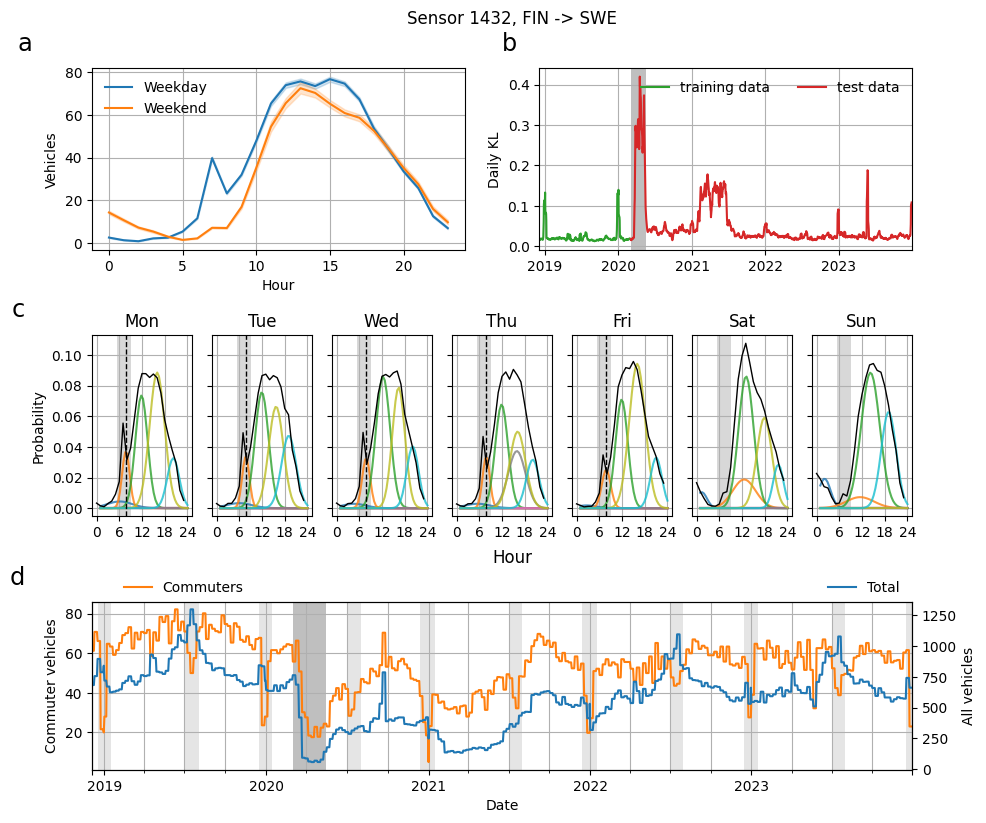

In [26]:

sensor = ('1432, FIN', '1432, SWE')

scores_fin = pd.read_pickle('../Data/eval_fin_gmm_bayesian_KL.pkl')

scores = scores_fin[[sensor]]


o = list(sensor)[0].split(', ')[1]
d = list(sensor)[1].split(', ')[1]
title_str =  'Sensor ' +list(sensor)[0].split(', ')[0]+', '+o + ' -> ' + d

fig = plt.figure(figsize=(10,8))

(topfig,bottomfig, lowestfig) = fig.subfigures(3,1)


# Top figure -----------------------------------------------------------------

ax_top = topfig.subplots(nrows= 1, ncols=2)
topfig.subplots_adjust(hspace=.2, bottom = 0.20, left = 0.08)

topfig.suptitle(title_str, y = 1.1)

d,c = utils.add_temp_inf(agg_fin.loc[sensor])
d = d.droplevel(level=1, axis=1).rename(columns = {sensor[0]: 'total_vehicles'})
d['new_date'] = pd.to_datetime(d['new_date'])
d['day_type'] = d['weekday'].isin(['Mon','Tue','Wed','Thu','Fri'])
d['day_type'] = np.where(d['day_type']== True, 'Weekday','Weekend')

d = d.groupby(['new_date','hour','day_type'])['total_vehicles'].sum('total_vehicles').reset_index()
d = d[(d['new_date']>datetime.datetime(2017,1,1))&(d['new_date']<datetime.datetime(2020,3,1))][['total_vehicles','hour','day_type']]

sns.lineplot(data = d, x = 'hour', y = 'total_vehicles', hue = 'day_type', ax=ax_top[0])

ax_top[0].set_ylabel('Vehicles')
ax_top[0].set_xlabel('Hour')
ax_top[0].legend(frameon=False).set_title('')
ax_top[0].grid(which='both')


d1 = datetime.date(2017, 1, 1)
d2 = datetime.date(2020,3,1)

# Top right figure -----------------------------------
train_scores = scores[(scores.index>=d1) & (scores.index<d2)].copy().rolling(7,min_periods=0).mean() # 7 day rolling mean.
ax_top[1].plot(train_scores.mean(axis=1).index,train_scores.mean(axis=1).values,color="C2", label="training data")


test_scores = scores[(scores.index<d1) | (scores.index>d2)].copy().rolling(7,min_periods=0).mean()
test_scores.mean(axis=1).plot(ax=ax_top[1],color="C3", label="test data")

ax_top[1].xaxis.set_major_locator(mdates.YearLocator(1))
# set formatter
ax_top[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax_top[1].legend(frameon=False, ncol=2)
ax_top[1].set_xlabel("")
ax_top[1].set_ylabel("Daily KL")
ax_top[1].set_xlim(datetime.date(2018,12,3),datetime.date(2023,12,31))
ax_top[1].grid(which='both')

ax_top[1].axvspan(xmin = datetime.datetime(2020,3,1), xmax = datetime.datetime(2020,5,15), fc = 'gray', alpha = 0.5)


# Bottom figure -----------------------------------------------------------------

ax_bottom = bottomfig.subplots(nrows= 1, ncols=7, sharey="row",sharex = 'col')

bottomfig.subplots_adjust(hspace=.2, bottom = 0.2, left = 0.08)


def plt_comps(gauss):
    means, covariances, weights = gauss.loc[day]
    clusters = range(10)
    order = [i[0] for i in sorted(zip(clusters, means), key=lambda x: x[1])]
    means = means[order]
    covariances = covariances[order]
    weights = weights[order]

    for m, c, w in zip(means, covariances, weights):
        xx = np.linspace(1, 24) # Evenly spaces numbers
        ax_bottom[n].plot(xx, scipy.stats.norm.pdf(xx, m[0]/60, np.sqrt(c)/60) * w, alpha=0.8) # sample from the 10 components.

    ax_bottom[n].grid(which='both')
    data = pd.DataFrame(data_fin.loc[day][sensor]).reset_index()
    data['hour'] = data['hourminute'].apply(lambda x: int(np.floor(x/60)))
    data = data.groupby('hour').sum()[sensor]   
    sns.lineplot(data = data / sum(data), ax=ax_bottom[n], ms=5, color="k", lw=1) # the actual data, normalized
    


for n, day in enumerate(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]):

    ##ROW ONE - Prepandemic
    plt_comps(gauss_fin[sensor])

    ax_bottom[n].set_xticks(range(0, 25, 6))
    ax_bottom[n].set_title(day)
    ax_bottom[n].set_xlabel('')
    # Add shaded area for commuting hours
    ax_bottom[n].axvspan(xmin = 5.5, xmax = 9, fc = 'gray', alpha = 0.3)
    
    commute_index_morning =  dict_commute_fin[sensor].get(day,'NO')
    if not isinstance(commute_index_morning,str):
        mu = models_fin[sensor].loc[day].means_[commute_index_morning]
        for i in range(len(commute_index_morning)):
            ax_bottom[n].axvline(x = mu[i][0]/60, color = 'k', lw = 1, ls = '--', label = 'Commuting component, morning')


ax_bottom[0].set_ylabel("Probability")
bottomfig.supxlabel('Hour')


# Lowest figure -----------------------------------------------------------------

d_commute = daily_fin[daily_fin.index == sensor].reset_index().copy()
d_commute['new_date'] = pd.to_datetime(d_commute.new_date)
d_commute = d_commute[d_commute['new_date']>datetime.datetime(2018,12,3)]
dictionary = dict(zip([0,1,2,3,4,5,6],["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]))
d_commute["weekday"] = d_commute.new_date.dt.weekday.map(dictionary)
d_commute['day_type'] = d_commute['weekday'].isin(['Mon','Tue','Wed','Thu','Fri'])
d_commute['day_type'] = np.where(d_commute['day_type']== True, 'Weekday','Weekend')
d_commute['week'] = d_commute.new_date.dt.isocalendar().week
d_commute['year'] = d_commute.new_date.dt.year


WeeklyMean_short = d_commute.groupby(['day_type','week','year'])['ShortTerm'].mean().rename('ShortTerm_WeeklyMean').reset_index()
WeeklyMean_all = d_commute.groupby(['week','year'])['total_vehicles'].mean().rename('total_vehicles_WeeklyMean').reset_index()

d_commute = d_commute.merge(WeeklyMean_short,how = 'left', on = ['week','year','day_type'])
d_commute = d_commute.merge(WeeklyMean_all,how = 'left', on = ['week','year'])



ax_lowest = lowestfig.subplots(nrows= 1, ncols=1, sharey="row")
lowestfig.subplots_adjust(hspace=.2, bottom = 0.25, left = 0.08)
ax_twin = ax_lowest.twinx()

d_commute[d_commute['day_type']=='Weekday'].plot(ax = ax_lowest, x = 'new_date', y = 'ShortTerm_WeeklyMean', label = 'Commuters',color = 'C1')
d_commute.plot(ax = ax_twin, x = 'new_date', y = 'total_vehicles_WeeklyMean', label = 'Total',color = 'C0')

ax_lowest.legend(ncol=2, frameon=False, bbox_to_anchor=(0.2, 1.2))
ax_twin.legend(ncol=2, frameon=False, bbox_to_anchor=(1, 1.2))

ax_lowest.set_xlabel("Date")  


ax_lowest.grid(which='both')
ax_lowest.set_ylabel('Commuter vehicles')
ax_twin.set_ylabel('All vehicles')

# Add shaded area for lowest plot
ax_lowest.axvspan(xmin = datetime.datetime(2019,7,1), xmax = datetime.datetime(2019,8,1), fc = 'gray', alpha = 0.2)
ax_lowest.axvspan(xmin = datetime.datetime(2020,7,1), xmax = datetime.datetime(2020,8,1), fc = 'gray', alpha = 0.2)
ax_lowest.axvspan(xmin = datetime.datetime(2021,7,1), xmax = datetime.datetime(2021,8,1), fc = 'gray', alpha = 0.2)
ax_lowest.axvspan(xmin = datetime.datetime(2022,7,1), xmax = datetime.datetime(2022,8,1), fc = 'gray', alpha = 0.2)
ax_lowest.axvspan(xmin = datetime.datetime(2023,7,1), xmax = datetime.datetime(2023,8,1), fc = 'gray', alpha = 0.2)

ax_lowest.axvspan(xmin = datetime.datetime(2018,12,15), xmax = datetime.datetime(2019,1,15), fc = 'gray', alpha = 0.2)
ax_lowest.axvspan(xmin = datetime.datetime(2019,12,15), xmax = datetime.datetime(2020,1,15), fc = 'gray', alpha = 0.2)
ax_lowest.axvspan(xmin = datetime.datetime(2020,12,15), xmax = datetime.datetime(2021,1,15), fc = 'gray', alpha = 0.2)
ax_lowest.axvspan(xmin = datetime.datetime(2021,12,15), xmax = datetime.datetime(2022,1,15), fc = 'gray', alpha = 0.2)
ax_lowest.axvspan(xmin = datetime.datetime(2022,12,15), xmax = datetime.datetime(2023,1,15), fc = 'gray', alpha = 0.2)
ax_lowest.axvspan(xmin = datetime.datetime(2023,12,15), xmax = datetime.datetime(2024,1,1), fc = 'gray', alpha = 0.2)

ax_lowest.axvspan(xmin = datetime.datetime(2020,3,1), xmax = datetime.datetime(2020,5,15), fc = 'gray', alpha = 0.5)
    
ax_top[0].text(x = -0.2, y = 1.1, s ='a', transform = ax_top[0].transAxes, size = 'xx-large')
ax_top[1].text(x = -0.1, y = 1.1, s ='b', transform = ax_top[1].transAxes, size = 'xx-large')
ax_bottom[0].text(x = -0.8, y = 1.1, s ='c', transform = ax_bottom[0].transAxes, size = 'xx-large')
ax_lowest.text(x = -0.1, y = 1.1, s ='d', transform = ax_lowest.transAxes, size = 'xx-large')



#plt.savefig('../Figures/FIN_SWE_SingleSensor_line_gmm.png',bbox_inches = 'tight', dpi = 300)
#plt.savefig('../Figures/FIN_SWE_SingleSensor_line_gmm.pdf',bbox_inches = 'tight', dpi = 300)
#plt.savefig('../Figures/FIN_SWE_SingleSensor_line_gmm.tiff',bbox_inches = 'tight', dpi = 300)
#plt.savefig('../Figures/FIN_SWE_SingleSensor_line_gmm.eps',bbox_inches = 'tight', dpi = 300)

Compute correlations for single senor data and holiday vector.

In [27]:
# First run the above plot code
d_commute['Holiday'] = 0
#d_commute['Holiday'] = np.where(d_commute['day_type']=="Weekend", 1, 0)
d_commute['Holiday'] = np.where( np.isin(d_commute['week'],[1,28,29,30,52]),1,d_commute['Holiday'])

d_commute['ShortTermFraction'] = d_commute['ShortTerm']/d_commute['total_vehicles']

end_year = 2020

y_logical = np.logical_and(d_commute['day_type']=='Weekday',d_commute['new_date']<datetime.datetime(end_year,3,5))
pb_corr_finsensor_commute_pre, pb_pval_finsensor_commute_pre = stats.pointbiserialr(x = d_commute[y_logical]['Holiday'], y = d_commute[y_logical]['ShortTerm'])

y_logical = d_commute['new_date']<datetime.datetime(end_year,3,5)
pb_corr_finsensor_all_pre, pb_pval_finsensor_all_pre = stats.pointbiserialr(x = d_commute[y_logical]['Holiday'], y = d_commute[y_logical]['total_vehicles'])

y_logical = np.logical_and(np.logical_and(d_commute['day_type']=='Weekday',d_commute['new_date']<datetime.datetime(end_year,3,5)),~np.isnan(d_commute['ShortTermFraction']))
pb_corr_finsensor_commute_frac_pre, pb_pval_finsensor_commute_frac_pre = stats.pointbiserialr(x = d_commute[y_logical]['Holiday'], y = d_commute[y_logical]['ShortTermFraction'])



In [28]:


print(pd.DataFrame({'Period': ['Pre-pandemic'],
                        'Commuting':["%.3f (%.3g)" % (pb_corr_finsensor_commute_pre,pb_pval_finsensor_commute_pre)],
                        'Total':["%.3f (%.3g)" % (pb_corr_finsensor_all_pre,pb_pval_finsensor_all_pre)],
                        'Fraction comm.': ["%.3f (%.3g)" % (pb_corr_finsensor_commute_frac_pre,pb_pval_finsensor_commute_frac_pre)]}).to_latex(index =False, float_format="{:.3f}".format))

\begin{tabular}{llll}
\toprule
Period & Commuting & Total & Fraction comm. \\
\midrule
Pre-pandemic & -0.602 (1.23e-33) & 0.293 (1.67e-10) & -0.676 (5.16e-45) \\
\bottomrule
\end{tabular}



Timeseries panel figure:

Text(-0.1, 1.1, 'c')

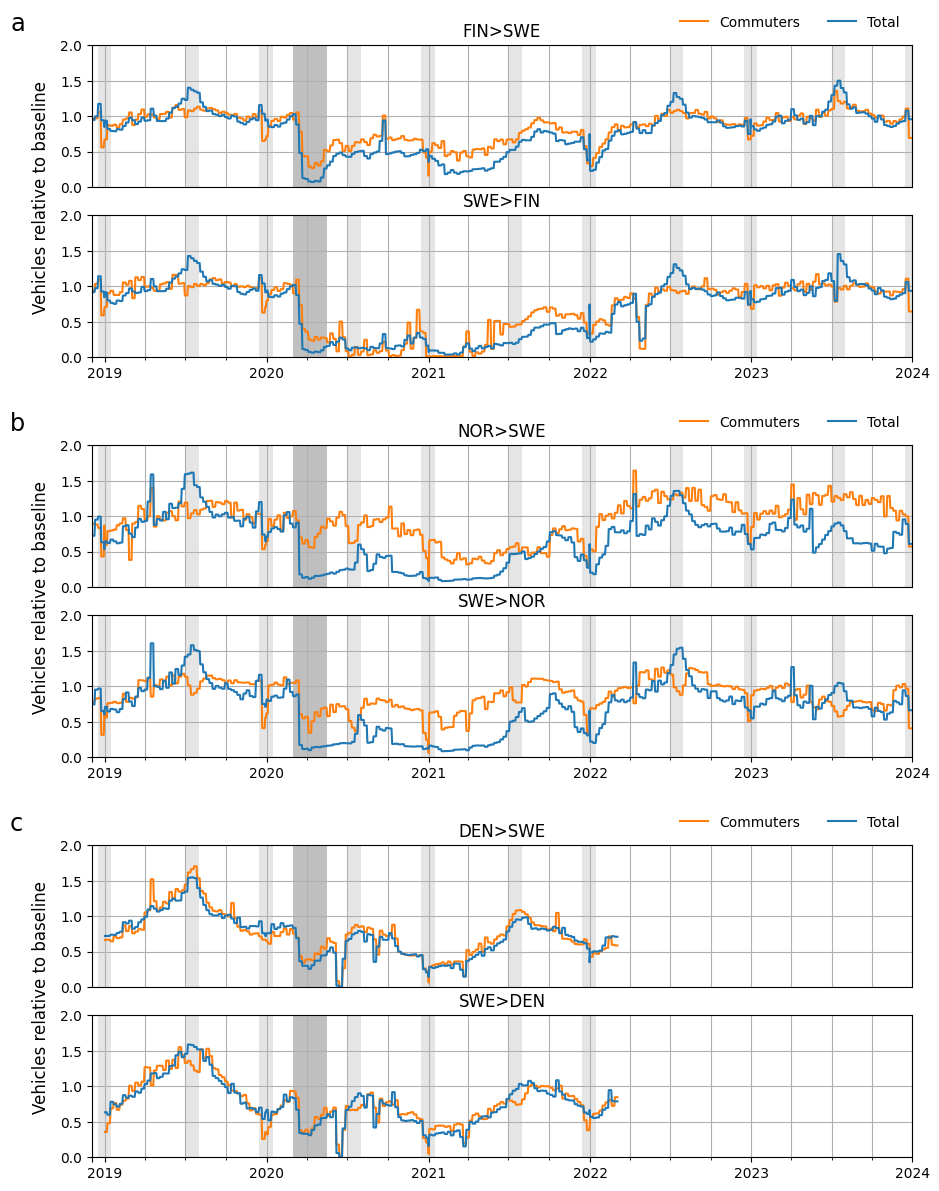

In [29]:
# This figure only plots weekdays (Mon-Fri) for commuters and all days for total numer of vehicles.   

fig = plt.figure(figsize=(10,12))

(topfig,midfig,bottomfig) = fig.subfigures(3,1)

# mid figures - FIN-SWE -----------------------------------------------------

direction1 = daily_commute_fin.from_to.unique()[0]
direction2 = daily_commute_fin.from_to.unique()[1]

daily_commute_fin_short = daily_commute_fin[daily_commute_fin['new_date']>datetime.datetime(2018,12,3)].copy() # Plot only from 2019

ax_top = topfig.subplots(nrows= 2, ncols=1, sharey="row")
#ax_top_twin1 = ax_top[0].twinx()
#ax_top_twin2 = ax_top[1].twinx()

topfig.subplots_adjust(hspace=.2, bottom = 0.10, left = 0.08)


ax_top[0].set_title(direction1,loc = 'center')
daily_commute_fin_short[np.logical_and(daily_commute_fin_short['from_to']==direction1,daily_commute_fin_short['day_type']=='Weekday')].plot(ax = ax_top[0], x = 'new_date', y = 'ShortTerm_relative', label = 'Commuters',color = 'C1')
daily_commute_fin_short[daily_commute_fin_short['from_to']==direction1].plot(ax = ax_top[0], x = 'new_date', y = 'total_relative', label = 'Total',color = 'C0')
#ax_top[0].legend(loc = 'upper left')
#ax_top[0].legend(frameon=False, bbox_to_anchor=(0.2, 1.3))
ax_top[0].legend(ncol=2, frameon=False, bbox_to_anchor=(1, 1.3))
ax_top[0].tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
ax_top[0].set_xlabel(None)  


#ax_top_twin1.legend(frameon=False, bbox_to_anchor=(1, 1.3))
#ax_top_twin1.legend(loc = 'upper right')
#ax_top_twin1.set_ylim([0,9000])
#ax_top[0].set_ylim([0,900])
ax_top[0].grid(which='both')
ax_top[0].set_ylabel(None)


ax_top[1].set_title(direction2,loc = 'center')
daily_commute_fin_short[np.logical_and(daily_commute_fin_short['from_to']==direction2,daily_commute_fin_short['day_type']=='Weekday')].plot(ax = ax_top[1],x = 'new_date', y = 'ShortTerm_relative', label = 'Commuters',color = 'C1')
daily_commute_fin_short[daily_commute_fin_short['from_to']==direction2].plot(ax = ax_top[1],x = 'new_date', y = 'total_relative', label = 'Total',color = 'C0')
ax_top[1].get_legend().remove()
#ax_top[1].legend(loc = 'upper left')
#ax_top[1].tick_params(axis = 'x', labelrotation = 45)
ax_top[1].set_xlabel('', labelpad = 4.0) 



#ax_top_twin2.get_legend().remove()
#ax_top_twin2.legend(loc = 'upper right')
ax_top[1].grid(which='both')
ax_top[1].set_ylabel(None)

#ax_top_twin2.set_ylim([0,9000])
ax_top[0].set_ylim([0,2])
ax_top[1].set_ylim([0,2])

ax_top[0].set_xlim([datetime.datetime(2018,12,3),datetime.datetime(2023,12,31)])
ax_top[1].set_xlim([datetime.datetime(2018,12,3),datetime.datetime(2023,12,31)])

# Add shaded area
ax_top[0].axvspan(xmin = datetime.datetime(2019,7,1), xmax = datetime.datetime(2019,8,1), fc = 'gray', alpha = 0.2)
ax_top[0].axvspan(xmin = datetime.datetime(2020,7,1), xmax = datetime.datetime(2020,8,1), fc = 'gray', alpha = 0.2)
ax_top[0].axvspan(xmin = datetime.datetime(2021,7,1), xmax = datetime.datetime(2021,8,1), fc = 'gray', alpha = 0.2)
ax_top[0].axvspan(xmin = datetime.datetime(2022,7,1), xmax = datetime.datetime(2022,8,1), fc = 'gray', alpha = 0.2)
ax_top[0].axvspan(xmin = datetime.datetime(2023,7,1), xmax = datetime.datetime(2023,8,1), fc = 'gray', alpha = 0.2)

ax_top[0].axvspan(xmin = datetime.datetime(2018,12,15), xmax = datetime.datetime(2019,1,15), fc = 'gray', alpha = 0.2)
ax_top[0].axvspan(xmin = datetime.datetime(2019,12,15), xmax = datetime.datetime(2020,1,15), fc = 'gray', alpha = 0.2)
ax_top[0].axvspan(xmin = datetime.datetime(2020,12,15), xmax = datetime.datetime(2021,1,15), fc = 'gray', alpha = 0.2)
ax_top[0].axvspan(xmin = datetime.datetime(2021,12,15), xmax = datetime.datetime(2022,1,15), fc = 'gray', alpha = 0.2)
ax_top[0].axvspan(xmin = datetime.datetime(2022,12,15), xmax = datetime.datetime(2023,1,15), fc = 'gray', alpha = 0.2)
ax_top[0].axvspan(xmin = datetime.datetime(2023,12,15), xmax = datetime.datetime(2024,1,1), fc = 'gray', alpha = 0.2)

ax_top[0].axvspan(xmin = datetime.datetime(2020,3,1), xmax = datetime.datetime(2020,5,15), fc = 'gray', alpha = 0.5)

ax_top[1].axvspan(xmin = datetime.datetime(2019,7,1), xmax = datetime.datetime(2019,8,1), fc = 'gray', alpha = 0.2)
ax_top[1].axvspan(xmin = datetime.datetime(2020,7,1), xmax = datetime.datetime(2020,8,1), fc = 'gray', alpha = 0.2)
ax_top[1].axvspan(xmin = datetime.datetime(2021,7,1), xmax = datetime.datetime(2021,8,1), fc = 'gray', alpha = 0.2)
ax_top[1].axvspan(xmin = datetime.datetime(2022,7,1), xmax = datetime.datetime(2022,8,1), fc = 'gray', alpha = 0.2)
ax_top[1].axvspan(xmin = datetime.datetime(2023,7,1), xmax = datetime.datetime(2023,8,1), fc = 'gray', alpha = 0.2)

ax_top[1].axvspan(xmin = datetime.datetime(2018,12,15), xmax = datetime.datetime(2019,1,15), fc = 'gray', alpha = 0.2)
ax_top[1].axvspan(xmin = datetime.datetime(2019,12,15), xmax = datetime.datetime(2020,1,15), fc = 'gray', alpha = 0.2)
ax_top[1].axvspan(xmin = datetime.datetime(2020,12,15), xmax = datetime.datetime(2021,1,15), fc = 'gray', alpha = 0.2)
ax_top[1].axvspan(xmin = datetime.datetime(2021,12,15), xmax = datetime.datetime(2022,1,15), fc = 'gray', alpha = 0.2)
ax_top[1].axvspan(xmin = datetime.datetime(2022,12,15), xmax = datetime.datetime(2023,1,15), fc = 'gray', alpha = 0.2)
ax_top[1].axvspan(xmin = datetime.datetime(2023,12,15), xmax = datetime.datetime(2024,1,1), fc = 'gray', alpha = 0.2)

ax_top[1].axvspan(xmin = datetime.datetime(2020,3,1), xmax = datetime.datetime(2020,5,15), fc = 'gray', alpha = 0.5)

topfig.supylabel('Vehicles relative to baseline')



# Middle figures - NOR-SWE -----------------------------------------------------

direction1 = daily_commute_nor.from_to.unique()[0]
direction2 = daily_commute_nor.from_to.unique()[1]

daily_commute_nor_short = daily_commute_nor[daily_commute_nor['new_date']>datetime.datetime(2018,12,3)].copy() # Plot only from 2019

ax_mid = midfig.subplots(nrows= 2, ncols=1, sharey="row")


midfig.subplots_adjust(hspace=.2, bottom = 0.10, left = 0.08)


ax_mid[0].set_title(direction1,loc = 'center')
daily_commute_nor_short[np.logical_and(daily_commute_nor_short['from_to']==direction1,daily_commute_nor_short['day_type']=='Weekday')].plot(ax = ax_mid[0], x = 'new_date', y = 'ShortTerm_relative', label = 'Commuters',color = 'C1')
daily_commute_nor_short[daily_commute_nor_short['from_to']==direction1].plot(ax = ax_mid[0], x = 'new_date', y = 'total_relative', label = 'Total',color = 'C0')
ax_mid[0].legend(ncol=2,frameon=False, bbox_to_anchor=(1, 1.3))

ax_mid[0].tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
ax_mid[0].set_xlabel(None)  

ax_mid[0].grid(which='both')
ax_mid[0].set_ylabel(None)


ax_mid[1].set_title(direction2,loc = 'center')
daily_commute_nor_short[np.logical_and(daily_commute_nor_short['from_to']==direction2,daily_commute_nor_short['day_type']=='Weekday')].plot(ax = ax_mid[1],x = 'new_date', y = 'ShortTerm_relative', label = 'Commuters',color = 'C1')
daily_commute_nor_short[daily_commute_nor_short['from_to']==direction2].plot(ax = ax_mid[1],x = 'new_date', y = 'total_relative', label = 'Total',color = 'C0')
ax_mid[1].get_legend().remove()

ax_mid[1].set_xlabel('', labelpad = 4.0) 

ax_mid[1].grid(which='both')
ax_mid[1].set_ylabel(None)

ax_mid[0].set_ylim([0,2])
ax_mid[1].set_ylim([0,2])

ax_mid[0].set_xlim([datetime.datetime(2018,12,3),datetime.datetime(2023,12,31)])
ax_mid[1].set_xlim([datetime.datetime(2018,12,3),datetime.datetime(2023,12,31)])

# Add shaded area
ax_mid[0].axvspan(xmin = datetime.datetime(2019,7,1), xmax = datetime.datetime(2019,8,1), fc = 'gray', alpha = 0.2)
ax_mid[0].axvspan(xmin = datetime.datetime(2020,7,1), xmax = datetime.datetime(2020,8,1), fc = 'gray', alpha = 0.2)
ax_mid[0].axvspan(xmin = datetime.datetime(2021,7,1), xmax = datetime.datetime(2021,8,1), fc = 'gray', alpha = 0.2)
ax_mid[0].axvspan(xmin = datetime.datetime(2022,7,1), xmax = datetime.datetime(2022,8,1), fc = 'gray', alpha = 0.2)
ax_mid[0].axvspan(xmin = datetime.datetime(2023,7,1), xmax = datetime.datetime(2023,8,1), fc = 'gray', alpha = 0.2)

ax_mid[0].axvspan(xmin = datetime.datetime(2018,12,15), xmax = datetime.datetime(2019,1,15), fc = 'gray', alpha = 0.2)
ax_mid[0].axvspan(xmin = datetime.datetime(2019,12,15), xmax = datetime.datetime(2020,1,15), fc = 'gray', alpha = 0.2)
ax_mid[0].axvspan(xmin = datetime.datetime(2020,12,15), xmax = datetime.datetime(2021,1,15), fc = 'gray', alpha = 0.2)
ax_mid[0].axvspan(xmin = datetime.datetime(2021,12,15), xmax = datetime.datetime(2022,1,15), fc = 'gray', alpha = 0.2)
ax_mid[0].axvspan(xmin = datetime.datetime(2022,12,15), xmax = datetime.datetime(2023,1,15), fc = 'gray', alpha = 0.2)
ax_mid[0].axvspan(xmin = datetime.datetime(2023,12,15), xmax = datetime.datetime(2024,1,1), fc = 'gray', alpha = 0.2)

ax_mid[0].axvspan(xmin = datetime.datetime(2020,3,1), xmax = datetime.datetime(2020,5,15), fc = 'gray', alpha = 0.5)

ax_mid[1].axvspan(xmin = datetime.datetime(2019,7,1), xmax = datetime.datetime(2019,8,1), fc = 'gray', alpha = 0.2)
ax_mid[1].axvspan(xmin = datetime.datetime(2020,7,1), xmax = datetime.datetime(2020,8,1), fc = 'gray', alpha = 0.2)
ax_mid[1].axvspan(xmin = datetime.datetime(2021,7,1), xmax = datetime.datetime(2021,8,1), fc = 'gray', alpha = 0.2)
ax_mid[1].axvspan(xmin = datetime.datetime(2022,7,1), xmax = datetime.datetime(2022,8,1), fc = 'gray', alpha = 0.2)
ax_mid[1].axvspan(xmin = datetime.datetime(2023,7,1), xmax = datetime.datetime(2023,8,1), fc = 'gray', alpha = 0.2)

ax_mid[1].axvspan(xmin = datetime.datetime(2018,12,15), xmax = datetime.datetime(2019,1,15), fc = 'gray', alpha = 0.2)
ax_mid[1].axvspan(xmin = datetime.datetime(2019,12,15), xmax = datetime.datetime(2020,1,15), fc = 'gray', alpha = 0.2)
ax_mid[1].axvspan(xmin = datetime.datetime(2020,12,15), xmax = datetime.datetime(2021,1,15), fc = 'gray', alpha = 0.2)
ax_mid[1].axvspan(xmin = datetime.datetime(2021,12,15), xmax = datetime.datetime(2022,1,15), fc = 'gray', alpha = 0.2)
ax_mid[1].axvspan(xmin = datetime.datetime(2022,12,15), xmax = datetime.datetime(2023,1,15), fc = 'gray', alpha = 0.2)
ax_mid[1].axvspan(xmin = datetime.datetime(2023,12,15), xmax = datetime.datetime(2024,1,1), fc = 'gray', alpha = 0.2)

ax_mid[1].axvspan(xmin = datetime.datetime(2020,3,1), xmax = datetime.datetime(2020,5,15), fc = 'gray', alpha = 0.5)


midfig.supylabel('Vehicles relative to baseline')

# Bottom figures - DEN-SWE -----------------------------------------------------

direction1 = daily_commute_den.from_to.unique()[0]
direction2 = daily_commute_den.from_to.unique()[1]

daily_commute_den_short = daily_commute_den[daily_commute_den['new_date']>datetime.datetime(2018,12,3)].copy() # Plot only from 2019

ax_bottom = bottomfig.subplots(nrows= 2, ncols=1, sharey="row")


bottomfig.subplots_adjust(hspace=.2, bottom = 0.10, left = 0.08)

ax_bottom[0].set_title(direction1,loc = 'center') # Change to direction1 if correct in file
daily_commute_den_short[np.logical_and(daily_commute_den_short['from_to']==direction1,daily_commute_den_short['day_type']=='Weekday')].plot(ax = ax_bottom[0], x = 'new_date', y = 'ShortTerm_relative', label = 'Commuters',color = 'C1')
daily_commute_den_short[daily_commute_den_short['from_to']==direction1].plot(ax = ax_bottom[0], x = 'new_date', y = 'total_relative', label = 'Total',color = 'C0')
ax_bottom[0].legend(ncol = 2, frameon=False, bbox_to_anchor=(1, 1.3))

ax_bottom[0].tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
ax_bottom[0].set_xlabel(None)  

ax_bottom[0].grid(which='both')
ax_bottom[0].set_ylabel(None)




ax_bottom[1].set_title(direction2,loc = 'center') # Change to direction2 if correct in file
daily_commute_den_short[np.logical_and(daily_commute_den_short['from_to']==direction2,daily_commute_den_short['day_type']=='Weekday')].plot(ax = ax_bottom[1],x = 'new_date', y = 'ShortTerm_relative', label = 'Commuters',color = 'C1')
daily_commute_den_short[daily_commute_den_short['from_to']==direction2].plot(ax = ax_bottom[1],x = 'new_date', y = 'total_relative', label = 'Total',color = 'C0')
ax_bottom[1].get_legend().remove()

ax_bottom[1].set_xlabel('', labelpad = 4.0) 

ax_bottom[1].grid(which='both')
ax_bottom[1].set_ylabel(None)


ax_bottom[0].set_ylim([0,2])
ax_bottom[1].set_ylim([0,2])

ax_bottom[0].set_xlim([datetime.datetime(2018,12,3),datetime.datetime(2023,12,31)])
ax_bottom[1].set_xlim([datetime.datetime(2018,12,3),datetime.datetime(2023,12,31)])


# Add shaded area
ax_bottom[0].axvspan(xmin = datetime.datetime(2019,7,1), xmax = datetime.datetime(2019,8,1), fc = 'gray', alpha = 0.2)
ax_bottom[0].axvspan(xmin = datetime.datetime(2020,7,1), xmax = datetime.datetime(2020,8,1), fc = 'gray', alpha = 0.2)
ax_bottom[0].axvspan(xmin = datetime.datetime(2021,7,1), xmax = datetime.datetime(2021,8,1), fc = 'gray', alpha = 0.2)

ax_bottom[0].axvspan(xmin = datetime.datetime(2018,12,15), xmax = datetime.datetime(2019,1,15), fc = 'gray', alpha = 0.2)
ax_bottom[0].axvspan(xmin = datetime.datetime(2019,12,15), xmax = datetime.datetime(2020,1,15), fc = 'gray', alpha = 0.2)
ax_bottom[0].axvspan(xmin = datetime.datetime(2020,12,15), xmax = datetime.datetime(2021,1,15), fc = 'gray', alpha = 0.2)
ax_bottom[0].axvspan(xmin = datetime.datetime(2021,12,15), xmax = datetime.datetime(2022,1,15), fc = 'gray', alpha = 0.2)


ax_bottom[0].axvspan(xmin = datetime.datetime(2020,3,1), xmax = datetime.datetime(2020,5,15), fc = 'gray', alpha = 0.5)

ax_bottom[1].axvspan(xmin = datetime.datetime(2019,7,1), xmax = datetime.datetime(2019,8,1), fc = 'gray', alpha = 0.2)
ax_bottom[1].axvspan(xmin = datetime.datetime(2020,7,1), xmax = datetime.datetime(2020,8,1), fc = 'gray', alpha = 0.2)
ax_bottom[1].axvspan(xmin = datetime.datetime(2021,7,1), xmax = datetime.datetime(2021,8,1), fc = 'gray', alpha = 0.2)

ax_bottom[1].axvspan(xmin = datetime.datetime(2018,12,15), xmax = datetime.datetime(2019,1,15), fc = 'gray', alpha = 0.2)
ax_bottom[1].axvspan(xmin = datetime.datetime(2019,12,15), xmax = datetime.datetime(2020,1,15), fc = 'gray', alpha = 0.2)
ax_bottom[1].axvspan(xmin = datetime.datetime(2020,12,15), xmax = datetime.datetime(2021,1,15), fc = 'gray', alpha = 0.2)
ax_bottom[1].axvspan(xmin = datetime.datetime(2021,12,15), xmax = datetime.datetime(2022,1,15), fc = 'gray', alpha = 0.2)

ax_bottom[1].axvspan(xmin = datetime.datetime(2020,3,1), xmax = datetime.datetime(2020,5,15), fc = 'gray', alpha = 0.5)

bottomfig.supylabel('Vehicles relative to baseline')



# Lettering
ax_top[0].text(x = -0.1, y = 1.1, s ='a', transform = ax_top[0].transAxes, size = 'xx-large')
ax_mid[0].text(x = -0.1, y = 1.1, s ='b', transform = ax_mid[0].transAxes, size = 'xx-large')
ax_bottom[0].text(x = -0.1, y = 1.1, s ='c', transform = ax_bottom[0].transAxes, size = 'xx-large')



#plt.savefig('../Figures/Nordic_timeseries_rel.png', dpi = 300)
#plt.savefig('../Figures/Nordic_timeseries_rel.pdf', dpi = 300)
#plt.savefig('../Figures/Nordic_timeseries_rel.tiff', dpi = 300)
#plt.savefig('../Figures/Nordic_timeseries_rel.eps', dpi = 300)


Evaluation figure

Text(-0.1, 1.1, 'c')

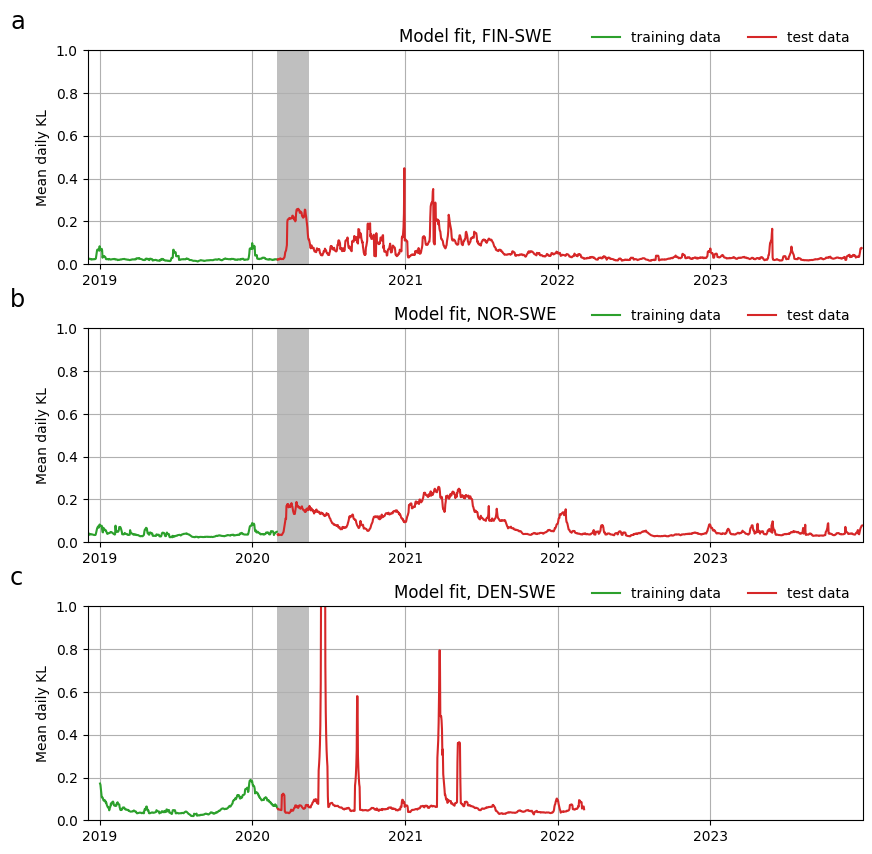

In [30]:
fig, ax = plt.subplots(3,1,figsize=(10,10))

fig.subplots_adjust(hspace=0.3)



# FIN-SWE -------------------------------------

d1 = datetime.date(2017, 1, 1)
d2 = datetime.date(2020,3,1)

scores_fin = pd.read_pickle('../Data/eval_fin_gmm_bayesian_KL.pkl')

train_scores = scores_fin[(scores_fin.index>=d1) & (scores_fin.index<d2)].copy().rolling(7,min_periods=0).mean() # 7 day rolling mean for each sensor.
ax[0].plot(train_scores.mean(axis=1).index,train_scores.mean(axis=1).values,color="C2", label="training data")


test_scores = scores_fin[(scores_fin.index<d1) | (scores_fin.index>d2)].copy().rolling(7,min_periods=0).mean()
test_scores.mean(axis=1).plot(ax=ax[0],color="C3", label="test data")

# set formatter

ax[0].legend(frameon=False, ncol=2,bbox_to_anchor=(1, 1.15))

ax[0].set_xlabel("")
ax[0].set_ylabel("Mean daily KL")
ax[0].set_ylim(0,1)
ax[0].set_xlim(datetime.datetime(2018,12,3),datetime.datetime(2023,12,31))
ax[0].grid(which='both')
ax[0].set_title('Model fit, FIN-SWE')

ax[0].axvspan(xmin = datetime.datetime(2020,3,1), xmax = datetime.datetime(2020,5,15), fc = 'gray', alpha = 0.5)

# NOR-SWE --------------------------------------------

scores = pd.read_pickle('../Data/eval_nor_gmm_bayesian_KL.pkl')


d1 = datetime.date(2017, 1, 1)
d2 = datetime.date(2020,3,1)

train_scores = scores[(scores.index>=d1) & (scores.index<d2)].copy().rolling(7,min_periods=0).mean() # 7 day rolling mean for each sensor.
ax[1].plot(train_scores.mean(axis=1).index,train_scores.mean(axis=1).values,color="C2", label="training data")


test_scores = scores[(scores.index<d1) | (scores.index>d2)].copy().rolling(7,min_periods=0).mean()
test_scores.mean(axis=1).plot(ax=ax[1],color="C3", label="test data")

ax[1].xaxis.set_major_locator(mdates.YearLocator(1))
# set formatter
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[1].legend(frameon=False, ncol=2, bbox_to_anchor=(1, 1.15))
ax[1].set_xlabel("")
ax[1].set_ylabel("Mean daily KL")
ax[1].set_ylim(0,1)
ax[1].set_xlim(datetime.datetime(2018,12,3),datetime.datetime(2023,12,31))
ax[1].grid(which='both')
ax[1].set_title('Model fit, NOR-SWE')

ax[1].axvspan(xmin = datetime.datetime(2020,3,1), xmax = datetime.datetime(2020,5,15), fc = 'gray', alpha = 0.5)


# DEN-SWE ---------------------------------------

scores = pd.read_pickle('../Data/eval_den_gmm_bayesian_KL.pkl')

d1 = datetime.date(2017, 1, 1)
d2 = datetime.date(2020,3,1)

train_scores = scores[(scores.index>=d1) & (scores.index<d2)].copy().rolling(7,min_periods=0).mean() # 7 day rolling mean for each sensor.
ax[2].plot(train_scores.mean(axis=1).index,train_scores.mean(axis=1).values,color="C2", label="training data")


test_scores = scores[(scores.index<d1) | (scores.index>d2)].copy().rolling(7,min_periods=0).mean()
test_scores.mean(axis=1).plot(ax=ax[2],color="C3", label="test data")

ax[2].xaxis.set_major_locator(mdates.YearLocator(1))
# set formatter
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[2].legend(frameon=False, ncol=2, bbox_to_anchor=(1, 1.15))
ax[2].set_xlabel("")
ax[2].set_ylabel("Mean daily KL")
ax[2].set_ylim(0,1)
ax[2].set_xlim(datetime.datetime(2018,12,3),datetime.datetime(2023,12,31))
ax[2].grid(which='both')
ax[2].set_title('Model fit, DEN-SWE')

ax[2].axvspan(xmin = datetime.datetime(2020,3,1), xmax = datetime.datetime(2020,5,15), fc = 'gray', alpha = 0.5)



# Labeling plots ----------------------
ax[0].text(x = -0.1, y = 1.1, s ='a', transform = ax[0].transAxes, size = 'xx-large')
ax[1].text(x = -0.1, y = 1.1, s ='b', transform = ax[1].transAxes, size = 'xx-large')
ax[2].text(x = -0.1, y = 1.1, s ='c', transform = ax[2].transAxes, size = 'xx-large')



#plt.savefig('../Figures/Evaluation_fig_kernel_KL.png', dpi = 300)
#plt.savefig('../Figures/Evaluation_fig_kernel_KL.pdf', dpi = 300)
#plt.savefig('../Figures/Evaluation_fig_kernel_KL.tiff', dpi = 300)
#plt.savefig('../Figures/Evaluation_fig_kernel_KL.eps', dpi = 300)